Assignment-2\
EE 769 : Introduction to Machine Learning\
Name - Simran Tanwar\
Roll no. - 20D070078


**Objective 1:** Learn various steps and due diligence needed to train successful classification models.

**Background**: Some experiments were conducted on mice to see if a treatment of Down's syndrome works or not.
Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular behavior or not (treatment _behavior). Readings for 77 proteins were recorded for the mice, but some of the readings were discarded if they seemed unreliable (out of range). Your job is to develop a pre-processing pipeline and a classifier, and also find out which subset of proteins is important in predicting which class. Specifically:

In [2]:
# Import important libraries 
import numpy as np
import pandas as pd                 # For data and dataframe handling
import matplotlib.pyplot as plt     # To display plots
import seaborn as sns               # Also a plotting tool package
import sklearn                      # Machine learning library

# Q1. Let your code read the data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv




In [3]:
# Read data from URL
data_url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv"
data_read = pd.read_csv(data_url) # Source: geeksforgeeks
pd.set_option('display.max_rows', None, 'display.max_columns', None)    # To display the complete data
display(data_read)

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0    0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1    0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2    0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3    0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4    0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
5    0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   
6    0.428033  0.573696  0.342709  2.334224  4.473130  0.225173  0.184004   
7    0.416923  0.564036  0.327703  2.260135  4.268735  0.214834  0.179668   
8    0.386311  0.538428  0.317720  2.125725  4.063950  0.207222  0.167778   
9    0.380827  0.499294  0.362462  2.096266  3.598587  0.227649  0.188093   
10   0.366511  0.513278  0.327792  2.072572  3.661058  0.229475  0.193797   
11   0.364154  0.499411  0.355124  2.006871  3.466627  0.216333  0.204358   
12   0.364873  0.482102  0.312539  1.946201  3.349592  0.230898  0.188821   
13   0.381911  0.485914  0.310951  1.958907  3.349290  0.225800  0.188519   
14   0.374410  0.462313  0.344629  1.861162  3.287123  0.221811  0.185459   
15   0.743118  0.862653  0.377742  2.735757  6.067570  0.219049  0.185338   
16   0.711480  0.807054  0.351591  2.546888  5.595574  0.199170  0.165975   
17   0.704633  0.802537  0.350110  2.467733  5.548400  0.205323  0.165058   
18   0.677359  0.770235  0.356397  2.563223  4.975196  0.228087  0.186498   
19   0.591572  0.678768  0.312480  2.164182  4.313938  0.195786  0.161102   
20   0.618517  0.716672  0.319701  2.285938  4.571180  0.206927  0.171598   
21   0.702608  0.699581  0.387750  2.437587  4.449231  0.258500  0.197019   
22   0.598869  0.690271  0.349774  2.308371  4.229412  0.221493  0.187104   
23   0.561867  0.641892  0.308488  2.157728  4.020693  0.216427  0.173775   
24   0.550970  0.561356  0.320853  2.197868  3.558896  0.237770  0.194589   
25   0.538413  0.701865  0.384445  2.482137  4.109706  0.288018  0.223206   
26   0.521127  0.583045  0.304279  2.053415  3.381345  0.251661  0.189476   
27   0.488372  0.540086  0.291310  1.913403  2.873623  0.215422  0.210526   
28   0.514855  0.564791  0.316056  1.957016  2.978824  0.250632  0.175095   
29   0.485100  0.556375  0.287250  1.892166  2.847005  0.223041  0.177573   
30   0.560614  0.763028  0.402962  2.933516  6.317279  0.192320  0.167636   
31   0.516108  0.749622  0.401297  2.919243  6.306811  0.192541  0.162270   
32   0.507321  0.770026  0.417959  2.925818  6.766150  0.201012  0.177756   
33   0.505093  0.695549  0.376029  2.915585  5.917957  0.226734  0.174271   
34   0.479120  0.689170  0.381125  2.913558  6.066537  0.221882  0.167177   
35   0.457992  0.703492  0.385843  2.904392  6.318467  0.216858  0.160666   
36   0.420542  0.622951  0.342757  2.635162  5.307963  0.228839  0.174306   
37   0.437457  0.640420  0.357512  2.731909  5.468987  0.232254  0.171089   
38   0.403742  0.640762  0.361935  2.732637  5.787256  0.243257  0.165037   
39   0.383423  0.583783  0.324573  2.467655  4.320530  0.250449  0.204403   
40   0.382650  0.596951  0.338937  2.488231  4.260928  0.251289  0.207801   
41   0.396305  0.577084  0.334286  2.485155  4.482296  0.248955  0.182758   
42   0.378329  0.590862  0.308094  2.371540  4.051175  0.248042  0.221149   
43   0.366570  0.573658  0.326369  2.441947  4.036498  0.266861  0.224544   
44   0.385658  0.583312  0.331943  2.429726  4.066493  0.256845  0.212256   
45   0.377846  0.555621  0.315109  2.220944  4.887097  0.194853  0.158325   
46   0.390713  0.582699  0.333042  2.376732  5.211334  0.206716  0.170640   
47   0.395358  0.576313  0.342568  2.356046  5.326220  0.207413  0.168601   
48   0.384859  0.540699  0.322270  2.177809  4.799273  0.231863  0.174648   
49   0.356514  0.524386  0.316709  2.177785  4.582756  0.221680  0.172593   
50   0.362915  0.555485  0.323543  2.252580  4.806477  0.219400  0.184632   
5

# Q2. Perform exploratory data analysis to find out:


# a. Which variables are usable, and which are not?

In [4]:
# Basic Information
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

We can see that all the features are real-valued. The classes, however needs to be one-hot encoded.

In [5]:
# Source: YOutube lecture video by Prof. Amit Sethi
for col in data_read.columns.values: # For each column
  unique_vals = pd.unique(data_read[col]) # Create a list of unique values
  # Calculate number of NaN entries and uniquevalues in a column
  print(col + ':' + str(len(unique_vals)) + ' unique values, ' + str(data_read[col].isna().sum()) + " NaN entries")

DYRK1A_N:762 unique values, 0 NaN entries
ITSN1_N:761 unique values, 0 NaN entries
BDNF_N:762 unique values, 0 NaN entries
NR1_N:762 unique values, 0 NaN entries
NR2A_N:762 unique values, 0 NaN entries
pAKT_N:762 unique values, 0 NaN entries
pBRAF_N:760 unique values, 0 NaN entries
pCAMKII_N:762 unique values, 0 NaN entries
pCREB_N:762 unique values, 0 NaN entries
pELK_N:762 unique values, 0 NaN entries
pERK_N:762 unique values, 0 NaN entries
pJNK_N:761 unique values, 0 NaN entries
PKCA_N:762 unique values, 0 NaN entries
pMEK_N:762 unique values, 0 NaN entries
pNR1_N:762 unique values, 0 NaN entries
pNR2A_N:762 unique values, 0 NaN entries
pNR2B_N:762 unique values, 0 NaN entries
pPKCAB_N:762 unique values, 0 NaN entries
pRSK_N:762 unique values, 0 NaN entries
AKT_N:762 unique values, 0 NaN entries
BRAF_N:762 unique values, 0 NaN entries
CAMKII_N:762 unique values, 0 NaN entries
CREB_N:758 unique values, 0 NaN entries
ELK_N:748 unique values, 15 NaN entries
ERK_N:762 unique values, 0 N

We can see that almost all columns have unique values except some, we can treat these columns as continuous variables. We will drop the columns with large no. of NaN entries ( these columns are BAD_N, BCL2_N, pCFOS_N, H3AcK18_N, EGR1_N, H3MeK4_N).Some columns have less NaN values. We will impute such variables later.

In [6]:
# Drop Variables
data_read.drop(['BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'], inplace=True, axis = 1)
display(data_read)

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0    0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1    0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2    0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3    0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4    0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
5    0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   
6    0.428033  0.573696  0.342709  2.334224  4.473130  0.225173  0.184004   
7    0.416923  0.564036  0.327703  2.260135  4.268735  0.214834  0.179668   
8    0.386311  0.538428  0.317720  2.125725  4.063950  0.207222  0.167778   
9    0.380827  0.499294  0.362462  2.096266  3.598587  0.227649  0.188093   
10   0.366511  0.513278  0.327792  2.072572  3.661058  0.229475  0.193797   
11   0.364154  0.499411  0.355124  2.006871  3.466627  0.216333  0.204358   
12   0.364873  0.482102  0.312539  1.946201  3.349592  0.230898  0.188821   
13   0.381911  0.485914  0.310951  1.958907  3.349290  0.225800  0.188519   
14   0.374410  0.462313  0.344629  1.861162  3.287123  0.221811  0.185459   
15   0.743118  0.862653  0.377742  2.735757  6.067570  0.219049  0.185338   
16   0.711480  0.807054  0.351591  2.546888  5.595574  0.199170  0.165975   
17   0.704633  0.802537  0.350110  2.467733  5.548400  0.205323  0.165058   
18   0.677359  0.770235  0.356397  2.563223  4.975196  0.228087  0.186498   
19   0.591572  0.678768  0.312480  2.164182  4.313938  0.195786  0.161102   
20   0.618517  0.716672  0.319701  2.285938  4.571180  0.206927  0.171598   
21   0.702608  0.699581  0.387750  2.437587  4.449231  0.258500  0.197019   
22   0.598869  0.690271  0.349774  2.308371  4.229412  0.221493  0.187104   
23   0.561867  0.641892  0.308488  2.157728  4.020693  0.216427  0.173775   
24   0.550970  0.561356  0.320853  2.197868  3.558896  0.237770  0.194589   
25   0.538413  0.701865  0.384445  2.482137  4.109706  0.288018  0.223206   
26   0.521127  0.583045  0.304279  2.053415  3.381345  0.251661  0.189476   
27   0.488372  0.540086  0.291310  1.913403  2.873623  0.215422  0.210526   
28   0.514855  0.564791  0.316056  1.957016  2.978824  0.250632  0.175095   
29   0.485100  0.556375  0.287250  1.892166  2.847005  0.223041  0.177573   
30   0.560614  0.763028  0.402962  2.933516  6.317279  0.192320  0.167636   
31   0.516108  0.749622  0.401297  2.919243  6.306811  0.192541  0.162270   
32   0.507321  0.770026  0.417959  2.925818  6.766150  0.201012  0.177756   
33   0.505093  0.695549  0.376029  2.915585  5.917957  0.226734  0.174271   
34   0.479120  0.689170  0.381125  2.913558  6.066537  0.221882  0.167177   
35   0.457992  0.703492  0.385843  2.904392  6.318467  0.216858  0.160666   
36   0.420542  0.622951  0.342757  2.635162  5.307963  0.228839  0.174306   
37   0.437457  0.640420  0.357512  2.731909  5.468987  0.232254  0.171089   
38   0.403742  0.640762  0.361935  2.732637  5.787256  0.243257  0.165037   
39   0.383423  0.583783  0.324573  2.467655  4.320530  0.250449  0.204403   
40   0.382650  0.596951  0.338937  2.488231  4.260928  0.251289  0.207801   
41   0.396305  0.577084  0.334286  2.485155  4.482296  0.248955  0.182758   
42   0.378329  0.590862  0.308094  2.371540  4.051175  0.248042  0.221149   
43   0.366570  0.573658  0.326369  2.441947  4.036498  0.266861  0.224544   
44   0.385658  0.583312  0.331943  2.429726  4.066493  0.256845  0.212256   
45   0.377846  0.555621  0.315109  2.220944  4.887097  0.194853  0.158325   
46   0.390713  0.582699  0.333042  2.376732  5.211334  0.206716  0.170640   
47   0.395358  0.576313  0.342568  2.356046  5.326220  0.207413  0.168601   
48   0.384859  0.540699  0.322270  2.177809  4.799273  0.231863  0.174648   
49   0.356514  0.524386  0.316709  2.177785  4.582756  0.221680  0.172593   
50   0.362915  0.555485  0.323543  2.252580  4.806477  0.219400  0.184632   
5

Now, we will one hot encode the classes. We use pre defined methods using pandas


In [7]:
# perform one hot encoding on the 'Genotype' and 'Treatment_Behavior' columns of the data_df dataframe
encoded_genotype = pd.get_dummies(data_read.Genotype, prefix='gen')
encoded_treatment = pd.get_dummies(data_read.Treatment_Behavior, prefix='treat')

# concatenate the two encoded dataframes along the columns axis (axis=1)
# reset_index(drop=True) resets the index of the resulting dataframe and drops the old index
temp_data_1 = pd.concat([encoded_genotype.reset_index(drop=True), encoded_treatment.reset_index(drop=True)], axis=1)

# concatenate the original data_read dataframe and the temp_data dataframe (which contains the encoded columns)
df1 = pd.concat([data_read.reset_index(drop=True), temp_data_1.reset_index(drop=True)], axis=1)

# drop the original 'Genotype' and 'Treatment_Behavior' columns from the resulting dataframe
# inplace=True modifies the dataframe in place instead of creating a new dataframe
df1.drop(['Genotype', 'Treatment_Behavior'], inplace=True, axis=1)

# display the first few rows of the resulting dataframe
df1.head()


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289   
1  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364   
2  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847   
3  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639   
4  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677   
1  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419   
2  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747   
3  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218   
4  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336   
1  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835   
2  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852   
3  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121   
4  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864   
1  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519   
2  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197   
3  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650   
4  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605   
1  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548   
2  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087   
3  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680   
4  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668   
1  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309   
2  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213   
3  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804   
4  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310   
1  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738   
2  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550   
3  0.123210  0.117439  0.234947  0.145068  0.430996  

In [8]:
# Impute variables: giving values to missing variables
# Source: https://scikit-learn.org/stable/modules/impute.html (link given by Prof in assignment)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=20, random_state=0)
imp.fit(df1)

#Imputed dataframe
imp_data = pd.DataFrame(data = imp.transform(df1), columns = df1.columns[:])

#checking if the NaN entries have been eliminated
for col in imp_data.columns.values:
    unique_vals_n = pd.unique(imp_data[col])
    print(col + " : " + str(len(unique_vals_n)) +" values, " + str(imp_data[col].isna().sum()) + " NaN entries")

DYRK1A_N : 762 values, 0 NaN entries
ITSN1_N : 761 values, 0 NaN entries
BDNF_N : 762 values, 0 NaN entries
NR1_N : 762 values, 0 NaN entries
NR2A_N : 762 values, 0 NaN entries
pAKT_N : 762 values, 0 NaN entries
pBRAF_N : 760 values, 0 NaN entries
pCAMKII_N : 762 values, 0 NaN entries
pCREB_N : 762 values, 0 NaN entries
pELK_N : 762 values, 0 NaN entries
pERK_N : 762 values, 0 NaN entries
pJNK_N : 761 values, 0 NaN entries
PKCA_N : 762 values, 0 NaN entries
pMEK_N : 762 values, 0 NaN entries
pNR1_N : 762 values, 0 NaN entries
pNR2A_N : 762 values, 0 NaN entries
pNR2B_N : 762 values, 0 NaN entries
pPKCAB_N : 762 values, 0 NaN entries
pRSK_N : 762 values, 0 NaN entries
AKT_N : 762 values, 0 NaN entries
BRAF_N : 762 values, 0 NaN entries
CAMKII_N : 762 values, 0 NaN entries
CREB_N : 758 values, 0 NaN entries
ELK_N : 762 values, 0 NaN entries
ERK_N : 762 values, 0 NaN entries
GSK3B_N : 762 values, 0 NaN entries
JNK_N : 762 values, 0 NaN entries
MEK_N : 762 values, 0 NaN entries
TRKA_N : 76

# b.Are there significant correlations among variables?

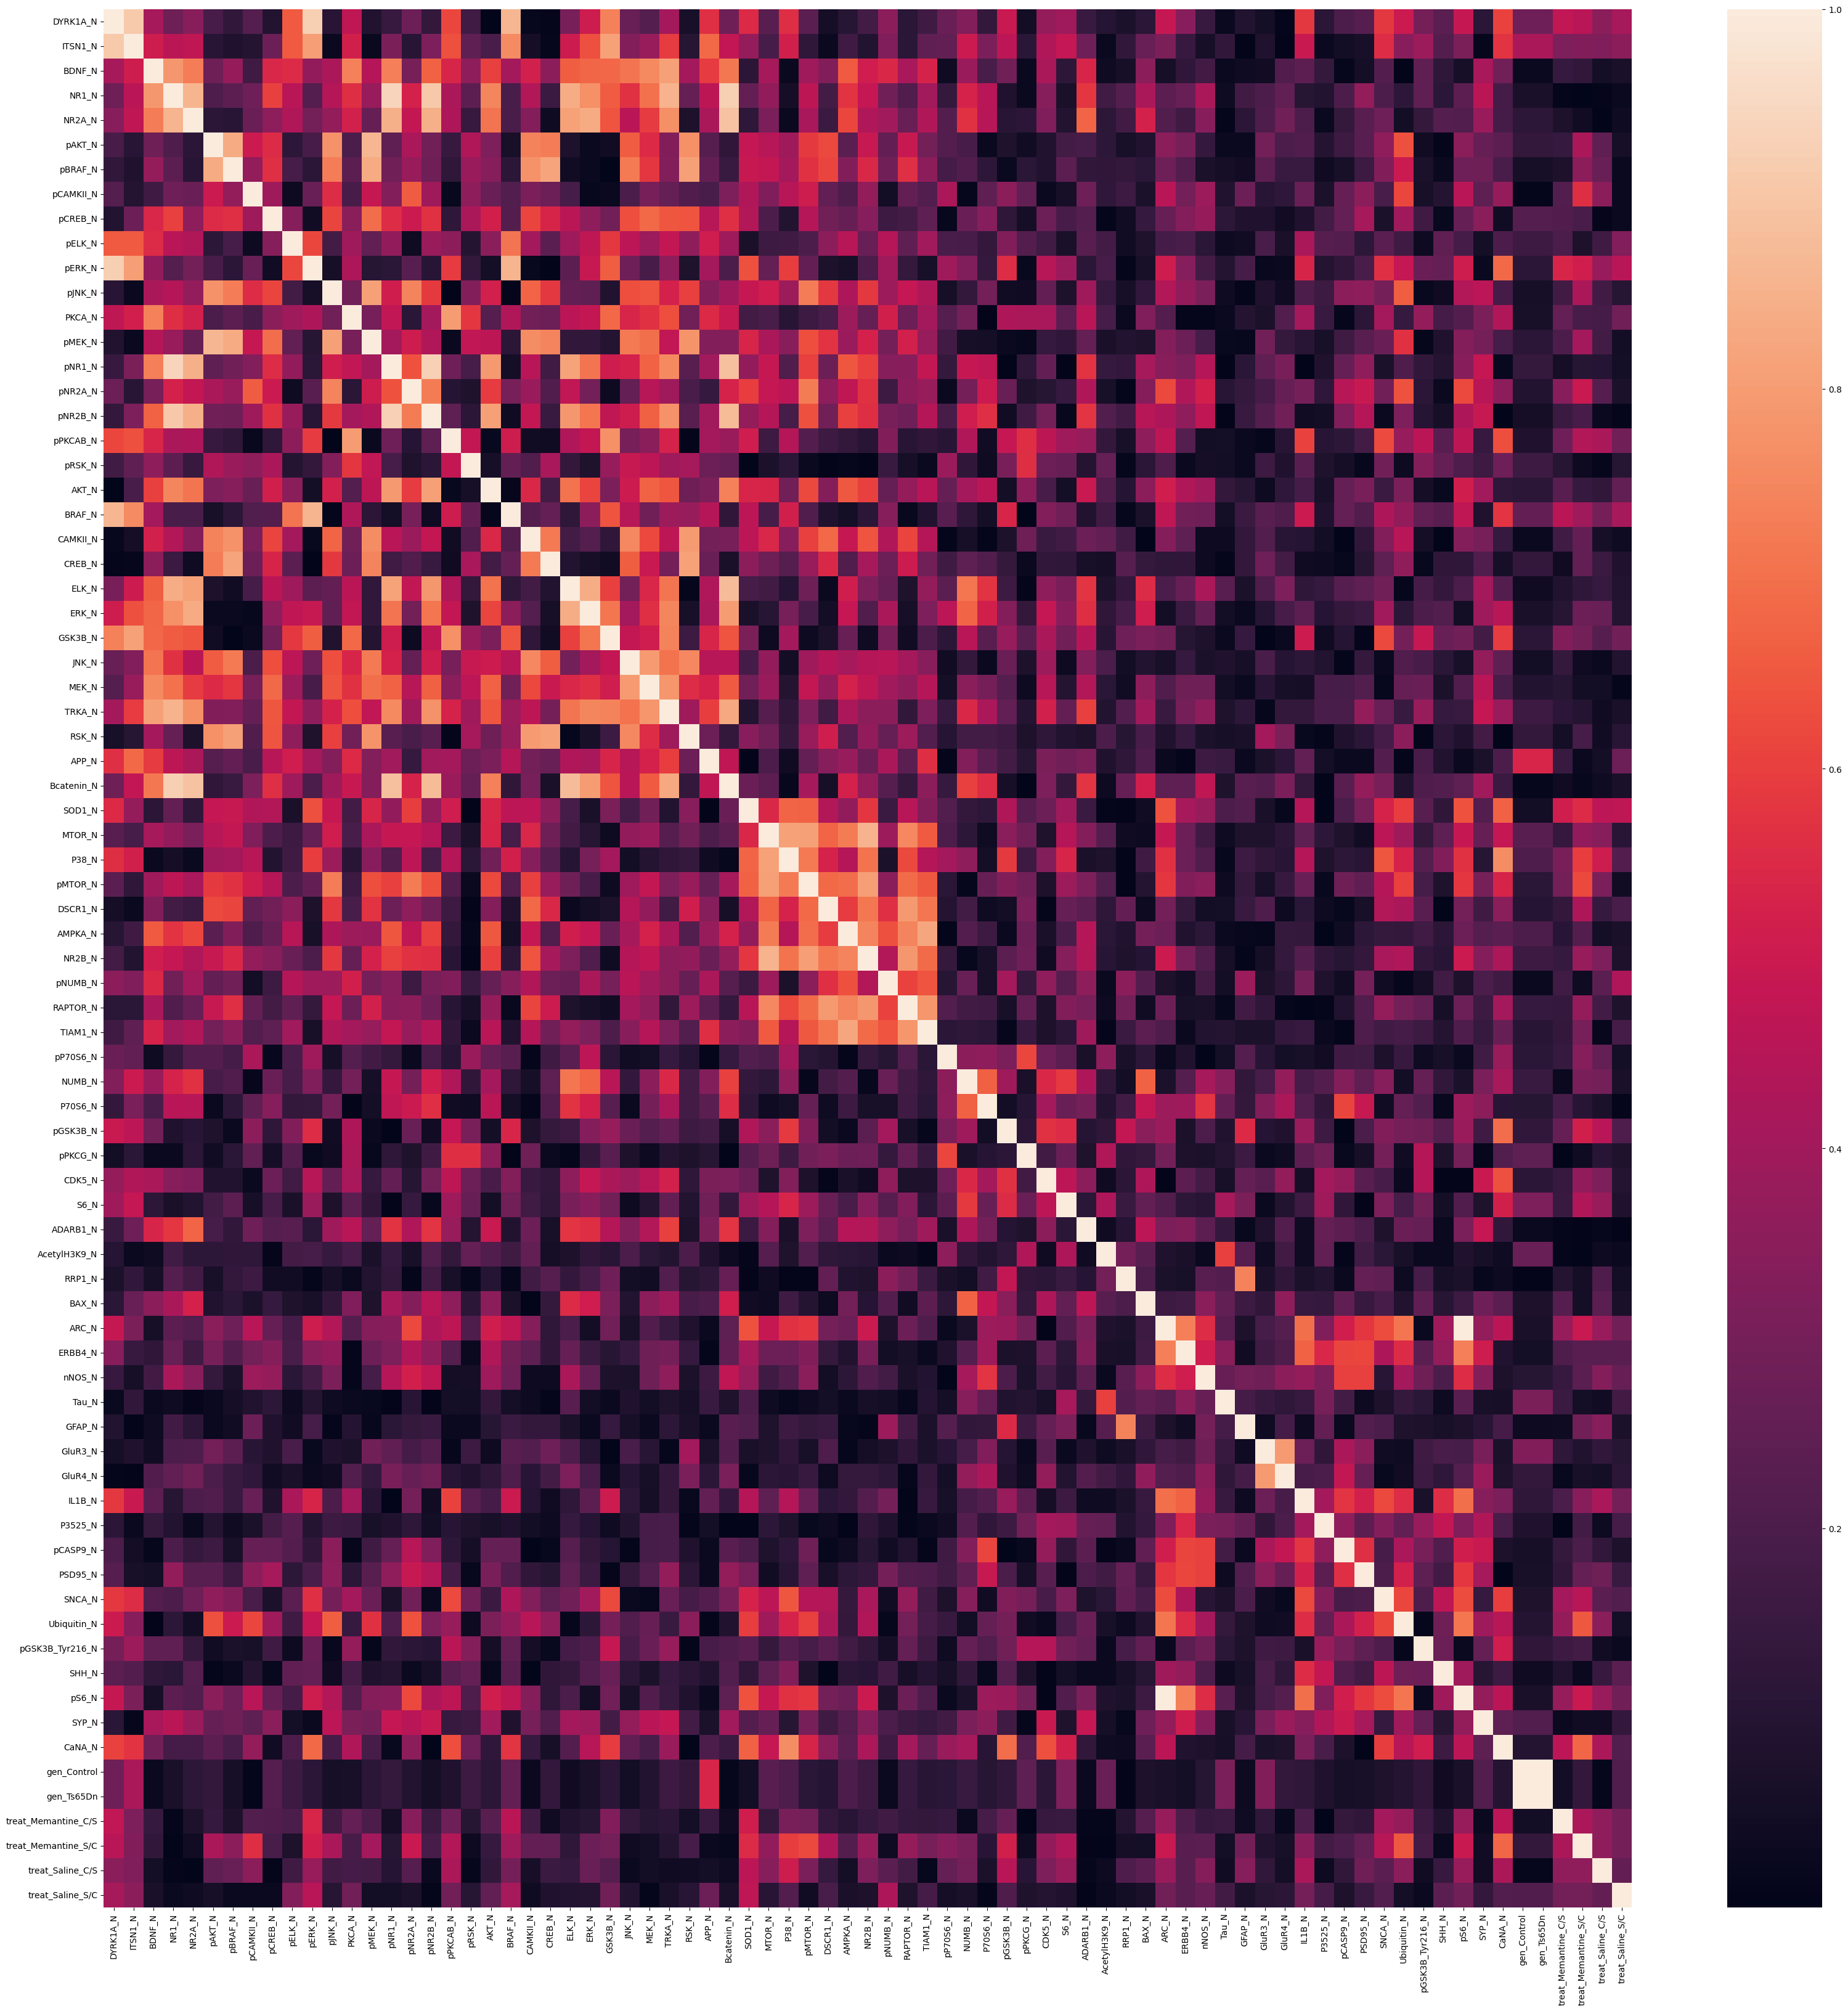

In [9]:
# Correlation
# Source: Youtube lecture video by Prof. Amit Sethi
# imp_data = imputed data with one hot encoding
corr_matrix = imp_data.corr(method = 'spearman') # Use spearman for non-linear
fig, ax = plt.subplots(figsize=(40,40))
# Heatmap will plot rectangular data as a color-encoded matrix.
# White box means highly correlated
sns.heatmap((abs(corr_matrix)), annot = False) # Use absolute values as we will count variables with negative correlation as correlated.
plt.show()

We can see that some variables are highly correlated(white box correspondence).We can choose one of all those variables which are highly correlated and can drop all others.\
We can clearly see fron the heatmap that pS6_N and ARC_N are highly correlated, we can drop this one of them(pS6_N) but there are some more variables which are correlated(light colored box in heatmap), for them we can choose a threshold.

In [10]:
# Set a threshold correlation
corr_th = 0.94
# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Apply the mask
up_tri = corr_matrix.where(mask)

# Identify the columns to drop
feature_drop = [column for column in up_tri.columns if any(up_tri[column] > corr_th)]

print(feature_drop)

['pNR1_N', 'pS6_N']


In [11]:
df2 = pd.DataFrame(imp_data)
# Drop highly correlated variables
df2.drop(feature_drop, inplace = True, axis = 1)
df2.head() # Will show first few rows of data
# df2 = data with imputation, one hot encoding and dropped highly correlated variables

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

    pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  CAMKII_N  \
0  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289  0.369608   
1  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364  0.356178   
2  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847  0.368089   
3  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639  0.362970   
4  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531  0.355311   

     CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N    TRKA_N  \
0  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677  0.813866   
1  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419  0.780504   
2  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747  0.785154   
3  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218  0.734492   
4  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667  0.702699   

      RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N   pMTOR_N  \
0  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336  0.825192   
1  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835  0.761718   
2  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852  0.757031   
3  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121  0.746980   
4  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415  0.691956   

    DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  pP70S6_N  \
0  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864  0.294170   
1  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519  0.276431   
2  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197  0.256648   
3  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650  0.398534   
4  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095  0.393447   

     NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  ADARB1_N  \
0  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605  1.339070   
1  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548  1.306323   
2  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087  1.279600   
3  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680  1.198765   
4  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345  1.206995   

   AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N     Tau_N  \
0      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668  0.125190   
1      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309  0.134275   
2      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213  0.132560   
3      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804  0.123210   
4      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710  0.136838   

     GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N   PSD95_N  \
0  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310  2.014875   
1  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738  2.004605   
2  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550  2.016831   
3  0.117439  0.234947  0.145068  0.430996  0.251103  

In [12]:
num_cols = df2.shape[1]
print("No. of columns in dataframe after imputation and dropping highly correlated variables: " + str(num_cols))

No. of columns in dataframe after imputation and dropping highly correlated variables: 75


Normalize ranges so that no variable has a disproportionate sway on the model.

In [13]:
# Normalize data(shift and scale so that columns are zero mean and unit variance)
# Source: Youtube lecture video by Prof. Amit Sethi
scaler = sklearn.preprocessing.StandardScaler() # For data normalization

# df3 = mean and standard deviation of df2
df3 = scaler.fit(df2[df2.columns[:-6]]) # Compute mean and std
data_X = pd.DataFrame(scaler.transform(df2[df2.columns[:-6]])) #normalized training data
data_Y_genotype = pd.DataFrame(df2[df2.columns[-6:-4]]) #classification based on genotype
data_Y_treat_behav = pd.DataFrame(df2[df2.columns[-4:]]) #classification based on treatment_behaviour

# Display all datas:
data_X.head()

0         1         2         3         4         5         6   \
0  0.239745  0.428489  2.372452  1.471921  2.269552 -0.351734 -0.186528   
1  0.279648  0.216934  1.976690  1.393675  1.940975 -0.533878 -0.365510   
2  0.259888  0.366815  2.117287  1.095124  1.873152 -0.600347 -0.256006   
3  0.015969 -0.045054  0.833934  0.452418  1.181185 -0.249043 -0.228099   
4 -0.010091 -0.043766  0.837716  0.157224  0.900303 -0.496664 -0.334981   

         7         8         9         10        11        12        13  \
0 -0.898820  0.648744  0.595213  0.332785 -0.148771  1.744386  0.498880   
1 -0.963191  0.479587  0.292333  0.351763 -0.292219  1.400565  0.143512   
2 -0.970144  0.585066  0.223626  0.304564 -0.444364  1.298019  0.152424   
3 -1.073520 -0.163587  0.289803  0.053109 -0.337665  1.217463  0.883760   
4 -1.087947 -0.641792  0.111757 -0.033273 -0.528799  0.937971  0.067135   

         14        15        16        17        18        19        20  \
0 -0.638085  1.111322  1.636758 -0.010072  1.404318  0.106532  0.056698   
1 -0.735638  0.550993  1.087449  0.046262  1.208717  0.040462 -0.203002   
2 -0.655447  0.573490  1.035656  0.395320  1.047766  0.038316  0.027320   
3 -1.097899 -0.035200  1.272925  0.550874  0.361958 -0.020632 -0.071659   
4 -1.164159 -0.355342  1.026794  0.640222  0.045984 -0.095760 -0.219760   

         21        22        23        24        25        26        27  \
0 -0.100029  2.036077  1.865816  1.371861  0.637339  1.182412  0.974728   
1 -0.313371  1.721389  1.555130  1.264509  0.376041  0.796367  0.696205   
2 -0.304251  1.734828  1.689014  1.233789  0.491453  0.981771  0.735024   
3 -0.079579  0.302698  0.754719  0.920934  0.489143  0.158778  0.312073   
4 -0.266532  0.417497  0.640049  0.691348  0.226909  0.018337  0.046655   

         28        29        30        31        32        33        34  \
0 -0.139642  0.905988  2.086295 -0.568891  0.136137 -0.839043  0.532073   
1 -0.449355  0.504819  1.813686 -0.677842 -0.410179 -0.951046  0.028366   
2 -0.316849  0.369411  1.866102 -0.672173 -0.387611 -0.950864 -0.008826   
3 -0.269796  0.149830  0.820467 -0.668919 -0.321911 -0.894665 -0.088587   
4 -0.534048 -0.060892  0.717668 -0.730470 -0.641406 -1.072847 -0.525229   

         35        36        37        38        39        40        41  \
0 -0.055233  1.325250  0.231229  0.596277  0.484745  1.073032 -0.587201   
1 -0.362699  0.870896 -0.226960  0.165981  0.141166  0.614182 -0.710235   
2 -0.376977  0.599747 -0.139084  0.094857 -0.031941  0.495650 -0.847440   
3 -0.346606  0.303175 -0.196344  0.141857  0.268612  0.422032  0.136639   
4 -0.442293 -0.131496 -0.586100 -0.105587 -0.049102  0.040722  0.101357   

         42        43        44        45        46        47        48  \
0  0.012156 -0.625642  1.482421 -0.409726  0.019249 -0.531315  0.472499   
1  0.009997 -0.596986  1.588239 -0.416401 -0.000088 -0.531729  0.376450   
2  0.087457 -0.546870  1.872194 -0.260318  0.236154 -0.299585  0.298070   
3 -0.673897 -1.109104  1.077785 -0.098511  0.070050 -1.001845  0.060971   
4 -0.726655 -1.062925  1.152049 -0.037064  0.083570 -0.864454  0.085112   

         49        50        51        52        53        54        55  \
0 -0.207718 -0.230565  0.468418 -1.058433 -0.731063 -0.211210 -1.193020   
1 -0.201188 -0.259795  0.241525 -1.039198 -0.384552 -0.146213 -1.063504   
2 -0.131171 -0.543015  0.557471 -0.924510 -0.709516 -0.229221 -1.087950   
3 -0.259222 -0.020091  0.281452 -1.267675 -1.005008 -0.720603 -1.221260   
4 -0.235011 -0.182989  0.435019 -1.160421 -0.921105 -0.565949 -1.026970   

         56        57        58        59        60        61        62  \
0 -0.410165  0.098131  0.649254 -1.146591 -1.380069  0.281954 -0.887186   
1 -0.199334  0.374696  0.620109 -0.840216 -1.045982  0.557972 -0.926013   
2 -0.233305  0.560666  0.636661 -0.216721 -1.121745  0.524945 -0.879791   
3 -0.256281  0.288487  0.743001 -1.146142 -1.262071 -0.196792 -1.105121   
4 -0.355950  0.856006  0.5

In [14]:
data_Y_genotype.head()

gen_Control  gen_Ts65Dn
0          1.0         0.0
1          1.0         0.0
2          1.0         0.0
3          1.0         0.0
4          1.0         0.0

In [15]:
data_Y_treat_behav.head()

treat_Memantine_C/S  treat_Memantine_S/C  treat_Saline_C/S  \
0                  1.0                  0.0               0.0   
1                  1.0                  0.0               0.0   
2                  1.0                  0.0               0.0   
3                  1.0                  0.0               0.0   
4                  1.0                  0.0               0.0   

   treat_Saline_S/C  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

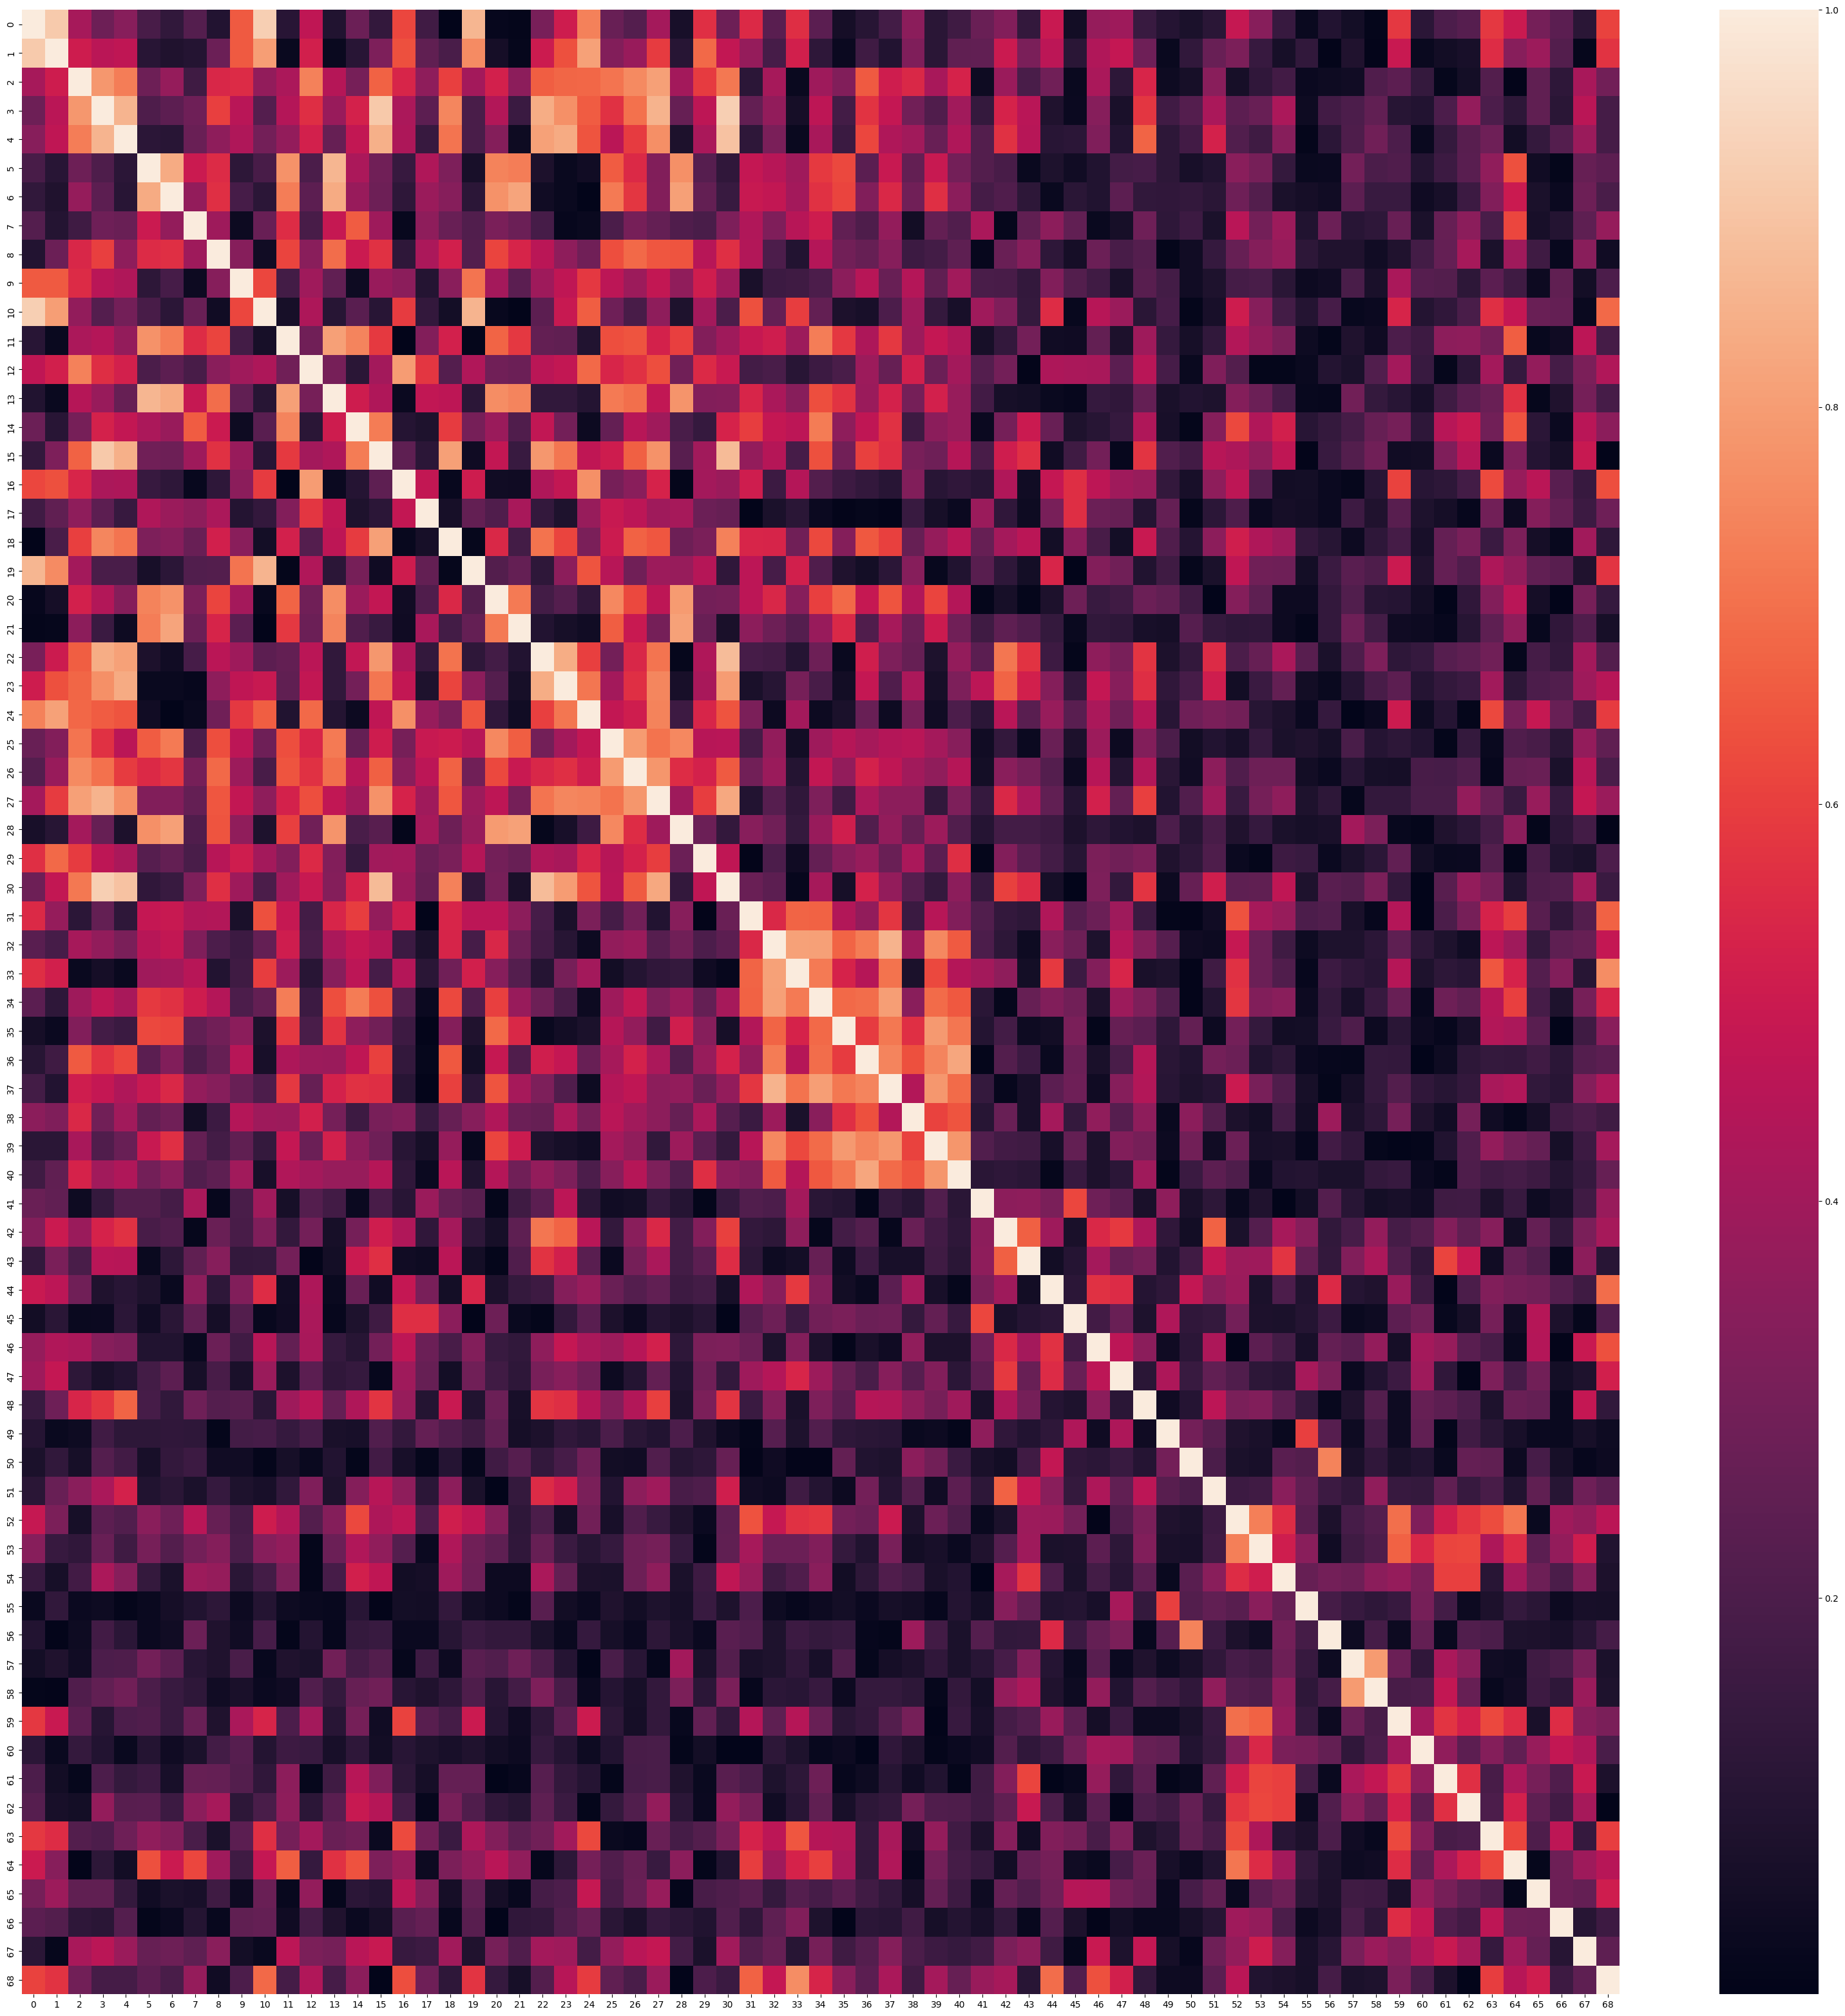

In [16]:
#plotting correlation matrix again to make sure all final inputs are uncorrelated
corrMatrix = data_X.corr(method='spearman')
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()

There are no highly correlated terms on the off diagonal squares, so we may leave in the remaining variables

In [17]:
#checking that the data is normalized after having run the previous instructions
display(data_X.mean())
display(data_X.var())

0     1.864942e-17
1     1.258836e-16
2     2.237930e-16
3     9.417955e-16
4    -3.543389e-16
5     2.237930e-16
6     1.114303e-15
7     2.704165e-16
8     7.366519e-16
9    -2.191306e-16
10   -1.305459e-16
11   -3.170401e-16
12    6.200931e-16
13   -2.564295e-16
14   -5.408331e-16
15   -5.594825e-16
16   -1.631824e-16
17    2.144683e-16
18   -9.371331e-16
19    1.818318e-16
20   -7.553013e-16
21    3.823130e-16
22   -3.729883e-16
23    4.009624e-16
24    1.118965e-16
25    2.331177e-17
26   -1.021056e-15
27    8.671978e-16
28   -5.501578e-16
29    5.594825e-16
30   -1.212212e-16
31    5.594825e-17
32    3.916377e-16
33   -3.823130e-16
34   -8.019249e-16
35    2.937283e-16
36    1.044367e-15
37    9.977437e-16
38   -3.729883e-16
39    2.797412e-16
40    0.000000e+00
41   -1.678447e-16
42   -1.063017e-15
43    1.212212e-16
44   -2.237930e-16
45   -1.491953e-16
46   -8.695290e-16
47    4.102871e-16
48    4.382613e-16
49    7.459766e-17
50   -2.004812e-16
51    2.377800e-16
52    2.7974

0     1.001314
1     1.001314
2     1.001314
3     1.001314
4     1.001314
5     1.001314
6     1.001314
7     1.001314
8     1.001314
9     1.001314
10    1.001314
11    1.001314
12    1.001314
13    1.001314
14    1.001314
15    1.001314
16    1.001314
17    1.001314
18    1.001314
19    1.001314
20    1.001314
21    1.001314
22    1.001314
23    1.001314
24    1.001314
25    1.001314
26    1.001314
27    1.001314
28    1.001314
29    1.001314
30    1.001314
31    1.001314
32    1.001314
33    1.001314
34    1.001314
35    1.001314
36    1.001314
37    1.001314
38    1.001314
39    1.001314
40    1.001314
41    1.001314
42    1.001314
43    1.001314
44    1.001314
45    1.001314
46    1.001314
47    1.001314
48    1.001314
49    1.001314
50    1.001314
51    1.001314
52    1.001314
53    1.001314
54    1.001314
55    1.001314
56    1.001314
57    1.001314
58    1.001314
59    1.001314
60    1.001314
61    1.001314
62    1.001314
63    1.001314
64    1.001314
65    1.001314
66    1.00

The means are of the order of 1e-15 which for all practical purposes is 0 and we have normalized the variance to 1 as well

# c. Are the classes balanced?

In [18]:
#Calculat2 the number of each class
count_Control = len(data_Y_genotype.loc[data_Y_genotype['gen_Control'] == 1])
print('Count of "Control" in Genotype: '+ str(count_Control))

count_Ts65Dn = len(data_Y_genotype.loc[data_Y_genotype['gen_Ts65Dn'] == 1])
print('Count of "Ts65Dn" in Genotype: '+ str(count_Ts65Dn))

count_Memantine_C_S = len(data_Y_treat_behav.loc[data_Y_treat_behav['treat_Memantine_C/S'] == 1])
print('Count of "Memantine_C/S" in Treatment Behavior: '+ str(count_Memantine_C_S))

count_Memantine_S_C = len(data_Y_treat_behav.loc[data_Y_treat_behav['treat_Memantine_S/C'] == 1])
print('Count of "Memantine_S/C" in Treatment Behavior: '+ str(count_Memantine_S_C))

count_Saline_C_S = len(data_Y_treat_behav.loc[data_Y_treat_behav['treat_Saline_C/S'] == 1])
print('Count of "Saline_C/S" in Treatment Behavior: '+ str(count_Saline_C_S))

count_Saline_S_C = len(data_Y_treat_behav.loc[data_Y_treat_behav['treat_Saline_S/C'] == 1])
print('Count of "Saline_S/C" in Treatment Behavior: '+ str(count_Saline_S_C))

Count of "Control" in Genotype: 435
Count of "Ts65Dn" in Genotype: 327
Count of "Memantine_C/S" in Treatment Behavior: 225
Count of "Memantine_S/C" in Treatment Behavior: 225
Count of "Saline_C/S" in Treatment Behavior: 180
Count of "Saline_S/C" in Treatment Behavior: 132


In [19]:
# Calculate percentage of each
per_control = count_Control*100/len(df2["gen_Control"])
print('Percentage of "Control" in Genotype: '+ str(per_control))

per_Ts65Dn = count_Ts65Dn*100/len(df2["gen_Ts65Dn"])
print('Percentage of "Ts65Dn" in Genotype: '+ str(per_Ts65Dn))

per_Memantine_C_S = count_Memantine_C_S*100/len(df2["treat_Memantine_C/S"])
print('Percentage pf "Memantine_C/S" in Treatment_Behavior: '+ str(per_Memantine_C_S))

per_Memantine_S_C = count_Memantine_S_C*100/len(df2["treat_Memantine_S/C"])
print('Percentage pf "Memantine_S/C" in Treatment_Behavior: '+ str(per_Memantine_S_C))

per_Saline_C_S = count_Saline_C_S*100/len(df2["treat_Saline_C/S"])
print('Percentage pf "Saline_C/S" in Treatment_Behavior: '+ str(per_Saline_C_S))

per_Saline_S_C = count_Saline_S_C*100/len(df2["treat_Saline_C/S"])
print('Percentage pf "Saline_S/C" in Treatment_Behavior: '+ str(per_Saline_S_C))


Percentage of "Control" in Genotype: 57.08661417322835
Percentage of "Ts65Dn" in Genotype: 42.91338582677165
Percentage pf "Memantine_C/S" in Treatment_Behavior: 29.52755905511811
Percentage pf "Memantine_S/C" in Treatment_Behavior: 29.52755905511811
Percentage pf "Saline_C/S" in Treatment_Behavior: 23.62204724409449
Percentage pf "Saline_S/C" in Treatment_Behavior: 17.322834645669293


Since, we can see that percentage of each class for genotype is around 50%, 57% for 'Control' and 43% for 'Ts65Dn', so, we can consider this as balanced class but for treatment behavior, we can see that are not equally divided, difference between percentage of 'Memantine_C/S' and that of 'Saline_S/C' is 12.2%, so, we cannot consider this as balanced class.

# Q3. Develop a strategy to deal with missing variables. You can choose to impute the variable. The recommended way is to use multivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html)

This part is already done in Q2(a)

# Q4. Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. Remember, you have two separate classification tasks - one is binary, the other has four classes. You may have to do some reading about multi-class classification metrics. 

We will use accuracy for genotype as it is binary and use  balanced accuracy for treatment behavior as, balanced accuracy is a metric used to measure the performance of a machine learning model in classification problems when the classes are imbalanced as in our case and for multi-class classification. It is defined as the arithmetic mean of sensitivity (true positive rate) and specificity (true negative rate).


In [20]:
from sklearn.metrics import classification_report #Import the classification_report library in order to display all the metrics

#Q5. Using five-fold cross-validation (you can use GridSearchCV from scikit-learn) to find the reasonable hyper-parameter settings for the following model types: 

In [21]:
# Encode the data into 0, 1 class numbers for Genotype
class_geno = data_Y_genotype.iloc[:,0]*0 + data_Y_genotype.iloc[:,1]*1
display(class_geno)
# Encode the data into 0, 1, 2, 3 class numbers for Treatment Behavior
class_treat_behav = data_Y_treat_behav.iloc[:,0]*0 + data_Y_treat_behav.iloc[:,1]*1 + data_Y_treat_behav.iloc[:,2]*2 + data_Y_treat_behav.iloc[:,3]*3
display(class_treat_behav)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
66     0.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
66     0.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0

In [22]:
# concatenate the two encoded dataframes along the columns axis (axis=1)
# reset_index(drop=True) resets the index of the resulting dataframe and drops the old index
temp_data_2 = pd.concat([class_geno.reset_index(drop=True), class_treat_behav.reset_index(drop=True)], axis=1)

# concatenate the original data_read dataframe and the temp_data dataframe (which contains the encoded columns)
df2 = pd.concat([df2.reset_index(drop=True), temp_data_2.reset_index(drop=True)], axis=1)

# drop the all one hot encoded columns from the resulting dataframe and inplace of them added genotype and treatment behavior columns with entries 0, 1 and 0, 1, 2, 3 respectively
# inplace=True modifies the dataframe in place instead of creating a new dataframe
df2.drop(['gen_Control', 'gen_Ts65Dn','treat_Memantine_C/S','treat_Memantine_S/C','treat_Saline_C/S','treat_Saline_S/C'], inplace=True, axis=1)

# display the first few rows of the resulting dataframe
df2.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

    pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  CAMKII_N  \
0  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289  0.369608   
1  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364  0.356178   
2  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847  0.368089   
3  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639  0.362970   
4  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531  0.355311   

     CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N    TRKA_N  \
0  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677  0.813866   
1  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419  0.780504   
2  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747  0.785154   
3  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218  0.734492   
4  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667  0.702699   

      RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N   pMTOR_N  \
0  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336  0.825192   
1  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835  0.761718   
2  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852  0.757031   
3  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121  0.746980   
4  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415  0.691956   

    DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  pP70S6_N  \
0  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864  0.294170   
1  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519  0.276431   
2  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197  0.256648   
3  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650  0.398534   
4  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095  0.393447   

     NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  ADARB1_N  \
0  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605  1.339070   
1  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548  1.306323   
2  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087  1.279600   
3  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680  1.198765   
4  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345  1.206995   

   AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N     Tau_N  \
0      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668  0.125190   
1      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309  0.134275   
2      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213  0.132560   
3      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804  0.123210   
4      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710  0.136838   

     GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N   PSD95_N  \
0  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310  2.014875   
1  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738  2.004605   
2  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550  2.016831   
3  0.117439  0.234947  0.145068  0.430996  0.251103  

In [23]:
#Store new genotype class and treatment behavior class in new dataframe
data_Y_geno = pd.DataFrame(df2[df2.columns[-2]])
data_Y_treat = pd.DataFrame(df2[df2.columns[-1]])

In [24]:
# Convert data into numpy arrays as all functions are defined for arrays
data_X_arr = np.array(data_X)
data_Y_geno_arr = np.array(data_Y_geno)
data_Y_treat_arr = np.array(data_Y_treat)

In [25]:
# Split data into training and testing set
# Source : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
for train_index, test_index in rs.split(data_Y_geno_arr):
    G_Y_train, G_Y_test = data_Y_geno_arr[train_index], data_Y_geno_arr[test_index]

for train_index, text_index in rs.split(data_Y_treat_arr):
    TB_Y_train, TB_Y_test = data_Y_treat_arr[train_index], data_Y_treat_arr[test_index]

for train_index, test_index in rs.split(data_X_arr):
    X_train, X_test = data_X_arr[train_index], data_X_arr[text_index]

#a. Linear SVM with regularization as hyperparameter

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score

In [27]:
# Define the hyper-parameter search space
# C : Regularization parameter(goes from 0. to 10 and there will be 20 values) 
param_grid = {'C': np.linspace(0.1, 2.1, 20)}
#param_grid = {'C' :[0.01,0.05,0.1,0.2,0.6,0.9, 1,2]}
# Define the GridSearchCV object with five-fold cross-validation and f1 score for binary classification and balanced accuracy score for multiclass classifiaction
grid_search_genotype = GridSearchCV(SVC(kernel = 'linear'), param_grid=param_grid, cv=5, scoring='f1',error_score='raise')
grid_search_treat_behav = GridSearchCV(SVC(kernel = 'linear'), param_grid=param_grid, cv=5, scoring='balanced_accuracy',error_score='raise')


# Fit the GridSearchCV objects on the binary and multi-class datasets
grid_search_genotype.fit(X_train, np.ravel(G_Y_train))
grid_search_treat_behav.fit(X_train, np.ravel(TB_Y_train))

# print best hyperparameters after tuning 
print('Best parameters for Class Genotypye:' + str(grid_search_genotype.best_params_)) 
print('Best parameters for Class Treatment Behavior:' +str(grid_search_treat_behav.best_params_))

genotype_predictions_linearSVM = grid_search_genotype.predict(X_test) 
treat_behav_predictions_linearSVM = grid_search_treat_behav.predict(X_test) 
   
# print classification report 
print(classification_report(G_Y_test, genotype_predictions_linearSVM))
print(classification_report(TB_Y_test, treat_behav_predictions_linearSVM))
print('Balanced accuracy for treatment behavior class (linearSVM)'+ str(balanced_accuracy_score(TB_Y_test, treat_behav_predictions_linearSVM)))
# Source: Youtube video lecture by Prof. Amit Sethi


Best parameters for Class Genotypye:{'C': 0.4157894736842105}
Best parameters for Class Treatment Behavior:{'C': 0.1}
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       103
         1.0       0.99      0.97      0.98        88

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        53
         1.0       1.00      0.98      0.99        55
         2.0       1.00      0.93      0.96        59
         3.0       0.96      1.00      0.98        24

    accuracy                           0.97       191
   macro avg       0.97      0.98      0.97       191
weighted avg       0.98      0.97      0.97       191

Balanced accuracy for treatment behavior class (linearSVM)0.9785053929121725


#b. RBF kernel SVM with kernel width and regularization as hyperparameters

In [28]:
# Define the hyper-parameter search space
# C : Regularization parameter(goes from 0. to 10 and there will be 20 values) 
param_grid = {'C': np.linspace(0.1, 2.1, 20),'gamma' : np.linspace(0.1, 4.1, 20)}

# Define the GridSearchCV object with five-fold cross-validation and f1 score for binary classification and balanced accuracy score for multiclass classifiaction
grid_search_genotype_rbf = GridSearchCV(SVC(kernel = 'rbf'), param_grid=param_grid, cv=5, scoring='f1')
grid_search_treat_behav_rbf = GridSearchCV(SVC(kernel = 'rbf'), param_grid=param_grid, cv=5, scoring='balanced_accuracy')

# Fit the GridSearchCV objects on the binary and multi-class datasets
grid_search_genotype_rbf.fit(X_train, np.ravel(G_Y_train))
grid_search_treat_behav_rbf.fit(X_train, np.ravel(TB_Y_train))

# print best hyperparameters after tuning 
print('Best parameters for Class Genotypye:'+str(grid_search_genotype_rbf.best_params_))
print('Best parameters for Class Treatment Behavior:'+str(grid_search_treat_behav_rbf.best_params_))

genotype_predictions_rbf = grid_search_genotype_rbf.predict(X_test) 
treat_behav_predictions_rbf = grid_search_treat_behav_rbf.predict(X_test) 
   
# print classification report 
print(classification_report(G_Y_test, genotype_predictions_rbf))
print(classification_report(TB_Y_test, treat_behav_predictions_rbf))
print('Balanced accuracy for treatment behavior class (RBF)'+ str(balanced_accuracy_score(TB_Y_test, treat_behav_predictions_rbf)))

Best parameters for Class Genotypye:{'C': 1.1526315789473685, 'gamma': 0.1}
Best parameters for Class Treatment Behavior:{'C': 1.0473684210526315, 'gamma': 0.1}
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       103
         1.0       1.00      0.91      0.95        88

    accuracy                           0.96       191
   macro avg       0.96      0.95      0.96       191
weighted avg       0.96      0.96      0.96       191

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      0.98      0.99        55
         2.0       0.98      1.00      0.99        59
         3.0       1.00      1.00      1.00        24

    accuracy                           0.99       191
   macro avg       1.00      1.00      1.00       191
weighted avg       0.99      0.99      0.99       191

Balanced accuracy for treatment behavior class (RBF)0.9954545454545455


#c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of neurons, weight decay)

In [29]:
from sklearn.neural_network import MLPClassifier

# Define the hyper-parameter search space
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Define the GridSearchCV object with five-fold cross-validation
grid_search_genotype_NN = GridSearchCV(MLPClassifier(activation='relu', max_iter = 400), param_grid=param_grid, cv=5, scoring='f1')
grid_search_treat_behav_NN = GridSearchCV(MLPClassifier(activation='relu', max_iter = 400), param_grid=param_grid, cv=5, scoring='balanced_accuracy')

# Fit the GridSearchCV objects on the binary and multi-class datasets
grid_search_genotype_NN.fit(X_train, np.ravel(G_Y_train))
grid_search_treat_behav_NN.fit(X_train, np.ravel(TB_Y_train))

# print best hyperparameters after tuning 
print('Best parameters for Class Genotypye:'+str(grid_search_genotype_NN.best_params_) )
print('Best parameters for Class Treatment Behavior:'+str(grid_search_treat_behav_NN.best_params_))

genotype_predictions_NN = grid_search_genotype_NN.predict(X_test) 
treat_behav_predictions_NN = grid_search_treat_behav_NN.predict(X_test) 
   
# print classification report 
print(classification_report(G_Y_test, genotype_predictions_NN))
print(classification_report(TB_Y_test, treat_behav_predictions_NN))
print('Balanced accuracy for treatment behavior class (NN)'+ str(balanced_accuracy_score(TB_Y_test, treat_behav_predictions_NN)))

Best parameters for Class Genotypye:{'alpha': 0.001, 'hidden_layer_sizes': (50,)}
Best parameters for Class Treatment Behavior:{'alpha': 0.001, 'hidden_layer_sizes': (50,)}
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       103
         1.0       1.00      0.98      0.99        88

    accuracy                           0.99       191
   macro avg       0.99      0.99      0.99       191
weighted avg       0.99      0.99      0.99       191

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      0.98      0.99        55
         2.0       1.00      1.00      1.00        59
         3.0       0.96      1.00      0.98        24

    accuracy                           0.99       191
   macro avg       0.99      1.00      0.99       191
weighted avg       0.99      0.99      0.99       191

Balanced accuracy for treatment behavior class (NN)0.995454545454

#d. Random forest (max tree depth, max number of variables per node)

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyper-parameter search space
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],
    'max_features': [1,3,6,10,15,21,28]
}

# Define the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Define the GridSearchCV object with five-fold cross-validation
grid_search_genotype_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='f1')
grid_search_treat_behav_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='balanced_accuracy')

# Fit the GridSearchCV objects on the binary and multi-class datasets
grid_search_genotype_rf.fit(X_train, np.ravel(G_Y_train))
grid_search_treat_behav_rf.fit(X_train, np.ravel(TB_Y_train))

# print best hyperparameters after tuning 
print('Best parameters for Class Genotypye:'+str(grid_search_genotype_rf.best_params_) )
print('Best parameters for Class Treatment Behavior:'+str(grid_search_treat_behav_rf.best_params_))

genotype_predictions_rf = grid_search_genotype_rf.predict(X_test) 
treat_behav_predictions_rf = grid_search_treat_behav_rf.predict(X_test) 
   
# print classification report 
print(classification_report(G_Y_test, genotype_predictions_rf))
print(classification_report(TB_Y_test, treat_behav_predictions_rf))
print('Balanced accuracy for treatment behavior class (RF)'+ str(balanced_accuracy_score(TB_Y_test, treat_behav_predictions_rf)))

Best parameters for Class Genotypye:{'max_depth': 18, 'max_features': 10}
Best parameters for Class Treatment Behavior:{'max_depth': 20, 'max_features': 6}
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       103
         1.0       1.00      0.95      0.98        88

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        55
         2.0       1.00      1.00      1.00        59
         3.0       1.00      1.00      1.00        24

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

Balanced accuracy for treatment behavior class (RF)1.0


#Q6. Check feature importance for each model to see if the same proteins are important for each model. Read up on how to find feature importance.

Reference : Sanket Potdar(20d070071)

In [31]:
from sklearn.inspection import permutation_importance
feature_names = data_X.columns.values
print(feature_names)
#Defining array for index value of features

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]


#a.For linear SVM

In Linear SVM, we can find feature importance by looking at the coefficients assigned to each feature. Features with higher absolute coefficient values are considered more important in determining the classification decision.

Genotype Class:

Features  Importance
31        31    0.006628
4          4    0.018733
25        25    0.018802
50        50    0.024529
15        15    0.029412
44        44    0.031068
26        26    0.036856
34        34    0.041550
58        58    0.048401
0          0    0.054831
11        11    0.060467
10        10    0.082593
54        54    0.084846
49        49    0.085063
6          6    0.086646
24        24    0.089198
55        55    0.091465
37        37    0.100562
51        51    0.106404
56        56    0.113375
47        47    0.127205
61        61    0.137305
46        46    0.138426
20        20    0.148872
48        48    0.190465
16        16    0.198608
66        66    0.200758
52        52    0.207455
13        13    0.209176
62        62    0.221646
2          2    0.222534
9          9    0.260140
60        60    0.268951
17        17    0.274548
8          8    0.287941
28        28    0.298292
33        33    0.305259
45        45    0.315542
59        59    0.328737
14        14    0.336955
21        21    0.340611
64        64    0.340651
42        42    0.344927
18        18    0.363149
39        39    0.375660
5          5    0.376431
63        63    0.425617
68        68    0.466736
38        38    0.497284
43        43    0.510317
30        30    0.513530
67        67    0.533649
53        53    0.560465
41        41    0.568359
36        36    0.581069
35        35    0.588716
19        19    0.605374
12        12    0.671039
7          7    0.672473
65        65    0.689507
22        22    0.690313
40        40    0.707295
3          3    0.739280
57        57    0.766931
32        32    0.781672
27        27    1.283181
23        23    1.299240
29        29    1.609002
1          1    1.747532

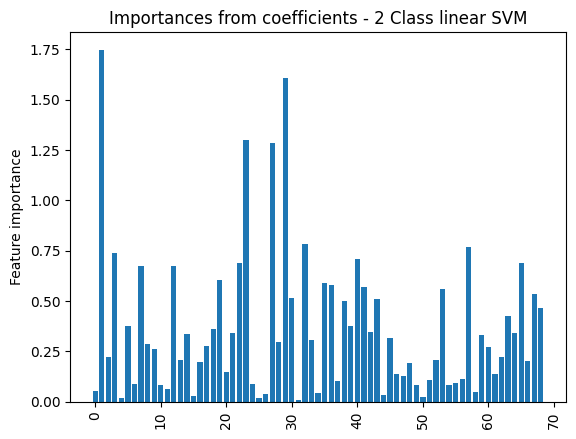

In [32]:
# Import SVC 
from sklearn.svm import SVC 
# Linear SVM model for Genotype class
model_svm_g = SVC(C = 0.4157894736842105, kernel = 'linear')
model_svm_g.fit(data_X_arr, np.ravel(data_Y_geno_arr))
# Access the coefficients of the Linear SVM model after fitting it to the data using the coef_ attribute of the model object
coef = model_svm_g.coef_
# Create dataframe with feature name and its importance as its two column
# Reference - Sanket Potdar(20d070078)
imp_feature_svm_g = pd.DataFrame(data={
    'Features': feature_names,
    'Importance': abs(model_svm_g.coef_[0])
})
#Sort in ascending order to display in increasing importance
imp_feature_svm_g = imp_feature_svm_g.sort_values(by='Importance', ascending=True)
display(imp_feature_svm_g)


plt.bar(x = imp_feature_svm_g['Features'], height = imp_feature_svm_g['Importance'])
plt.title('Importances from coefficients - 2 Class linear SVM')
plt.xticks(rotation='vertical')
plt.ylabel('Feature importance')
plt.show()

Treatment Behavior Class:

Features  Importance
2          2    0.000149
67        67    0.001040
20        20    0.001765
29        29    0.002715
36        36    0.003773
6          6    0.004934
50        50    0.008107
37        37    0.011001
15        15    0.011717
35        35    0.011910
58        58    0.015091
61        61    0.015675
66        66    0.016837
5          5    0.017966
39        39    0.019271
24        24    0.019289
26        26    0.020426
11        11    0.024805
41        41    0.025338
57        57    0.026559
3          3    0.026922
65        65    0.028106
28        28    0.028409
30        30    0.029155
49        49    0.031097
9          9    0.031251
22        22    0.031560
55        55    0.034691
52        52    0.034844
4          4    0.035707
1          1    0.035770
32        32    0.038940
48        48    0.039591
17        17    0.046030
54        54    0.047274
43        43    0.049599
8          8    0.051243
59        59    0.054813
45        45    0.057805
27        27    0.058369
25        25    0.059870
13        13    0.064769
0          0    0.067615
19        19    0.068781
14        14    0.071118
47        47    0.071375
62        62    0.072207
53        53    0.073930
56        56    0.075477
42        42    0.075714
40        40    0.076419
34        34    0.078969
21        21    0.079122
63        63    0.079160
18        18    0.080190
16        16    0.081755
23        23    0.082190
44        44    0.083245
12        12    0.088556
46        46    0.103549
10        10    0.108094
33        33    0.109216
64        64    0.115606
60        60    0.116152
7          7    0.134497
51        51    0.137140
31        31    0.198892
68        68    0.216341
38        38    0.220492

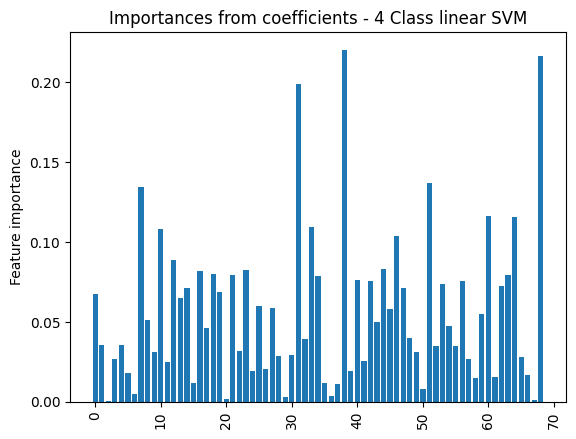

In [33]:
# Import SVC 
from sklearn.svm import SVC 
# Linear SVM model for Genotype class
model_svm_t = SVC(C = 0.1, kernel = 'linear')
model_svm_t.fit(data_X_arr, np.ravel(data_Y_treat_arr))
# Access the coefficients of the Linear SVM model after fitting it to the data using the coef_ attribute of the model object
coef = model_svm_t.coef_
# Create dataframe with feature name and its importance as its two column
imp_feature_svm_t = pd.DataFrame(data={
    'Features': feature_names,
    'Importance': abs(model_svm_t.coef_[0])
})
#Sort in ascending order to display in increasing importance
imp_feature_svm_t = imp_feature_svm_t.sort_values(by='Importance', ascending=True)
display(imp_feature_svm_t)


plt.bar(x = imp_feature_svm_t['Features'], height = imp_feature_svm_t['Importance'])
plt.title('Importances from coefficients - 4 Class linear SVM')
plt.xticks(rotation='vertical')
plt.ylabel('Feature importance')
plt.show()

#b.For RBF Kernel

In SVM with RBF kernel, the feature importance can be assessed by analyzing the weights assigned to each feature in the resulting support vector machine model. However, unlike linear SVM where the feature weights are directly interpretable, the RBF kernel does not assign weights to individual features, but rather measures the similarity between each data point and the kernel's center points.

One approach to estimate feature importance in an RBF SVM is to use permutation feature importance. This involves randomly shuffling the values of a single feature in the test set, and then evaluating the resulting decrease in model performance (e.g. accuracy or F1 score). The feature with the largest decrease in performance is then considered the most important feature.

Genotype CLass

Features  Importance
0          0    0.008024
1          1    0.007091
2          2    0.000000
3          3    0.000306
4          4    0.000613
5          5    0.002763
6          6    0.002146
7          7    0.000000
8          8    0.000306
9          9    0.009267
10        10    0.008648
11        11    0.003067
12        12    0.001228
13        13    0.002455
14        14    0.000613
15        15    0.002147
16        16    0.000000
17        17    0.003068
18        18    0.001532
19        19    0.009897
20        20    0.003378
21        21    0.000919
22        22    0.000920
23        23    0.000000
24        24    0.004613
25        25    0.004303
26        26    0.000919
27        27    0.002148
28        28    0.002148
29        29    0.001531
30        30    0.000000
31        31    0.000306
32        32    0.001228
33        33    0.002761
34        34    0.008030
35        35    0.003068
36        36    0.001840
37        37    0.004303
38        38    0.001225
39        39    0.001839
40        40    0.001533
41        41    0.007094
42        42    0.000613
43        43    0.000613
44        44    0.000613
45        45    0.000000
46        46    0.000613
47        47    0.000000
48        48    0.001532
49        49    0.005538
50        50    0.003992
51        51    0.001226
52        52    0.000613
53        53    0.000000
54        54    0.000613
55        55    0.003993
56        56    0.005232
57        57    0.000000
58        58    0.000919
59        59    0.000306
60        60    0.001840
61        61    0.000919
62        62    0.003381
63        63    0.000000
64        64    0.000306
65        65    0.000306
66        66    0.003378
67        67    0.002149
68        68    0.000000

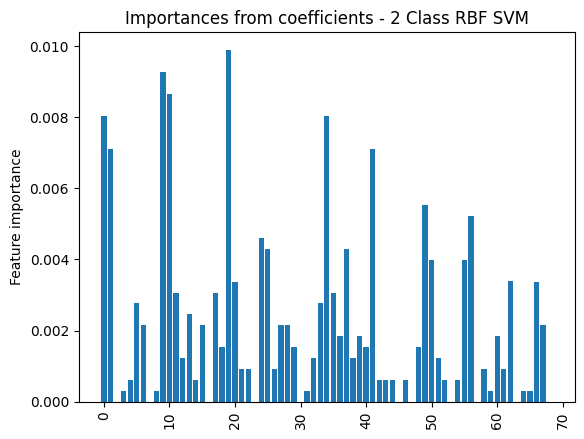

In [34]:
# Import SVC 
from sklearn.svm import SVC 
# RBF kernel model for Genotype class
model_rbf_g = SVC(C = 1.1526315789473685, kernel = 'rbf', gamma = 0.1)
model_rbf_g.fit(data_X_arr, np.ravel(data_Y_geno_arr))
# Calculate permutation feature importance(Reference: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)
result_rbf_g = permutation_importance(model_rbf_g, data_X_arr, data_Y_geno_arr, scoring = 'f1')
# Print the importance scores
importance_scores_rbf_g = result_rbf_g.importances_mean
#print(importance_scores_rbf_g)

# Create dataframe with feature name and its importance as its two column
imp_feature_rbf_g = pd.DataFrame(data={
    'Features': feature_names,
    'Importance': importance_scores_rbf_g
})
display(imp_feature_rbf_g)
plt.bar(x = imp_feature_rbf_g['Features'], height = imp_feature_rbf_g['Importance'])
plt.title('Importances from coefficients - 2 Class RBF SVM')
plt.xticks(rotation='vertical')
plt.ylabel('Feature importance')
plt.show()

Treatment behavior class:

Features  Importance
0          0    0.008586
1          1    0.007475
2          2    0.002495
3          3    0.001515
4          4    0.002874
5          5    0.002495
6          6    0.003854
7          7    0.000000
8          8    0.001136
9          9    0.007500
10        10    0.007253
11        11    0.003005
12        12    0.001136
13        13    0.002338
14        14    0.001045
15        15    0.004076
16        16    0.000000
17        17    0.002848
18        18    0.002495
19        19    0.010141
20        20    0.003854
21        21    0.001136
22        22    0.003030
23        23    0.001894
24        24    0.003697
25        25    0.005318
26        26    0.002273
27        27    0.004611
28        28    0.002116
29        29    0.001894
30        30    0.001136
31        31    0.003409
32        32    0.001737
33        33    0.001202
34        34    0.001737
35        35    0.003030
36        36    0.001960
37        37    0.002783
38        38    0.003030
39        39    0.001894
40        40    0.002273
41        41    0.004273
42        42    0.001737
43        43    0.002182
44        44    0.001515
45        45    0.000379
46        46    0.002652
47        47    0.000758
48        48    0.001359
49        49    0.021722
50        50    0.004338
51        51    0.001869
52        52    0.000379
53        53    0.001268
54        54    0.001515
55        55    0.016707
56        56    0.002470
57        57    0.000000
58        58    0.001045
59        59    0.001515
60        60    0.000601
61        61    0.000980
62        62    0.000758
63        63    0.000000
64        64    0.001136
65        65    0.001515
66        66    0.004010
67        67    0.002116
68        68    0.000000

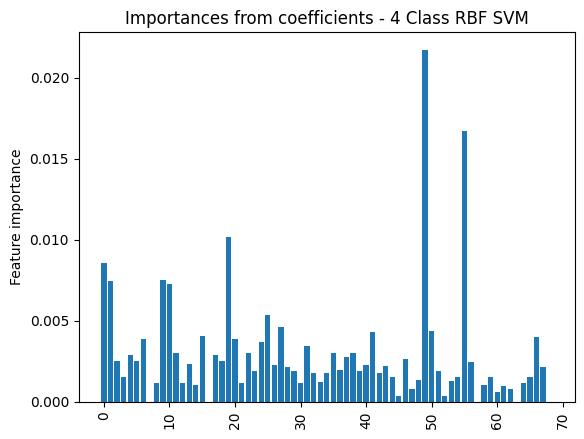

In [35]:
# Import SVC 
from sklearn.svm import SVC 
# RBF kernel model for treatment behavior class
model_rbf_t = SVC(C = 1.0473684210526315, kernel = 'rbf', gamma = 0.1)
model_rbf_t.fit(data_X_arr, np.ravel(data_Y_treat_arr))
# Calculate permutation feature importance
result_rbf_t = permutation_importance(model_rbf_t, data_X_arr, data_Y_treat_arr, scoring = 'balanced_accuracy')
# Print the importance scores
importance_scores_rbf_t = result_rbf_t.importances_mean
#print(importance_scores_rbf_t)

# Create dataframe with feature name and its importance as its two column
imp_feature_rbf_t = pd.DataFrame(data={
    'Features': feature_names,
    'Importance': importance_scores_rbf_t
})
display(imp_feature_rbf_t)
plt.bar(x = imp_feature_rbf_t['Features'], height = imp_feature_rbf_t['Importance'])
plt.title('Importances from coefficients - 4 Class RBF SVM')
plt.xticks(rotation='vertical')
plt.ylabel('Feature importance')
plt.show()

#c.For NN with ReLU hidden layer and softmax output

Genotype Class:

Features  Importance
0          0    0.002136
1          1    0.009691
2          2    0.000000
3          3    0.000613
4          4    0.000000
5          5    0.000920
6          6    0.000000
7          7    0.000000
8          8    0.001527
9          9    0.000306
10        10    0.001223
11        11    0.000306
12        12    0.000000
13        13    0.000000
14        14    0.000917
15        15    0.000000
16        16    0.000000
17        17    0.000000
18        18    0.000000
19        19    0.002440
20        20    0.000000
21        21    0.000000
22        22    0.002147
23        23    0.000613
24        24    0.000000
25        25    0.000306
26        26    0.000919
27        27    0.008930
28        28    0.000000
29        29    0.031259
30        30    0.000000
31        31    0.000000
32        32    0.003363
33        33    0.000000
34        34    0.000000
35        35    0.006748
36        36    0.000918
37        37    0.000000
38        38    0.000611
39        39    0.000000
40        40    0.014631
41        41    0.000000
42        42    0.000612
43        43    0.000000
44        44    0.000000
45        45    0.000000
46        46    0.000000
47        47    0.000000
48        48    0.000306
49        49    0.003363
50        50    0.000000
51        51    0.000306
52        52    0.000000
53        53    0.000306
54        54    0.000000
55        55    0.000916
56        56    0.000000
57        57    0.001221
58        58    0.000306
59        59    0.000305
60        60    0.000306
61        61    0.001830
62        62    0.002145
63        63    0.000000
64        64    0.000000
65        65    0.000000
66        66    0.000306
67        67    0.003378
68        68    0.000920

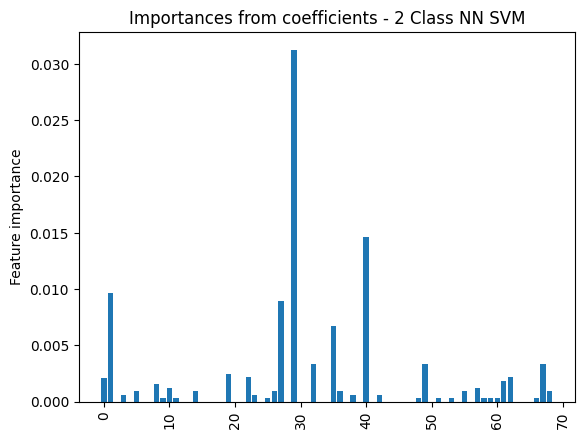

In [36]:
# Import SVC
from sklearn.svm import SVC 
# NN model for Genotype class
model_NN_g = MLPClassifier(hidden_layer_sizes=(200,), activation='relu',alpha=0.001, max_iter = 500)
model_NN_g.fit(data_X_arr, np.ravel(data_Y_geno_arr))
# Calculate permutation feature importance
result_NN_g = permutation_importance(model_NN_g, data_X_arr, data_Y_geno_arr, scoring = 'f1')
# Print the importance scores
importance_scores_NN_g = result_NN_g.importances_mean
#print(importance_scores_NN_g)

# Create dataframe with feature name and its importance as its two column
imp_feature_NN_g = pd.DataFrame(data={
    'Features': feature_names,
    'Importance': importance_scores_NN_g
})
display(imp_feature_NN_g)
plt.bar(x = imp_feature_NN_g['Features'], height = imp_feature_NN_g['Importance'])
plt.title('Importances from coefficients - 2 Class NN SVM')
plt.xticks(rotation='vertical')
plt.ylabel('Feature importance')
plt.show()

Treatment Behavior Class

Features  Importance
0          0    0.000000
1          1    0.000379
2          2    0.000833
3          3    0.000000
4          4    0.001056
5          5    0.000000
6          6    0.000000
7          7    0.004889
8          8    0.000444
9          9    0.001136
10        10    0.000758
11        11    0.000222
12        12    0.000000
13        13    0.000000
14        14    0.000000
15        15    0.000444
16        16    0.000000
17        17    0.000000
18        18    0.001490
19        19    0.000980
20        20    0.001111
21        21    0.000000
22        22    0.000222
23        23    0.000000
24        24    0.000000
25        25    0.000889
26        26    0.000222
27        27    0.000000
28        28    0.000000
29        29    0.000556
30        30    0.000278
31        31    0.000444
32        32    0.000980
33        33    0.000000
34        34    0.000000
35        35    0.001490
36        36    0.000000
37        37    0.001333
38        38    0.001515
39        39    0.000222
40        40    0.000601
41        41    0.000500
42        42    0.000000
43        43    0.004384
44        44    0.000000
45        45    0.000000
46        46    0.000778
47        47    0.000000
48        48    0.000000
49        49    0.000000
50        50    0.000000
51        51    0.007111
52        52    0.000000
53        53    0.000000
54        54    0.001000
55        55    0.000667
56        56    0.000000
57        57    0.000278
58        58    0.000000
59        59    0.001611
60        60    0.000379
61        61    0.003258
62        62    0.000278
63        63    0.000000
64        64    0.000823
65        65    0.001101
66        66    0.000000
67        67    0.000000
68        68    0.000000

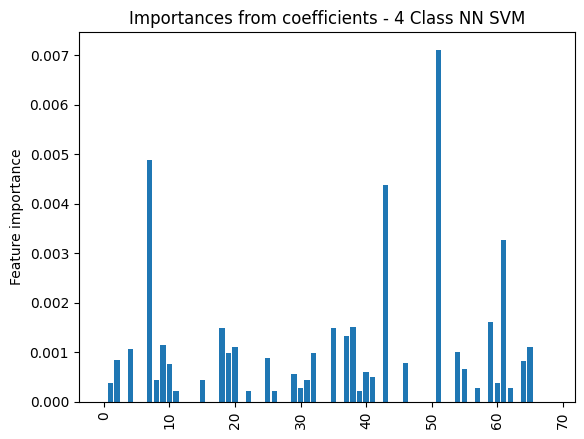

In [37]:
# Import SVC 
from sklearn.svm import SVC 
# NN model for treatment behavior class
model_NN_t = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',alpha=0.0001, max_iter = 500)
model_NN_t.fit(data_X_arr, np.ravel(data_Y_treat_arr))
# Calculate permutation feature importance
result_NN_t = permutation_importance(model_NN_t, data_X_arr, data_Y_treat_arr, scoring = 'balanced_accuracy')
# Print the importance scores
importance_scores_NN_t = result_NN_t.importances_mean
#print(importance_scores_NN_t)

# Create dataframe with feature name and its importance as its two column
imp_feature_NN_t = pd.DataFrame(data={
    'Features': feature_names,
    'Importance': importance_scores_NN_t
})
display(imp_feature_NN_t)
plt.bar(x = imp_feature_NN_t['Features'], height = imp_feature_NN_t['Importance'])
plt.title('Importances from coefficients - 4 Class NN SVM')
plt.xticks(rotation='vertical')
plt.ylabel('Feature importance')
plt.show()

#d.Random Forest

 Random forest has a built-in feature importance measure, which can be used to estimate the relative importance of each feature in the input. The feature importance measure in random forest is based on the decrease in impurity (or gain in information) caused by each feature when it is used to split the data in the decision trees.

Features  Importance
0          0    0.019780
1          1    0.058854
2          2    0.009272
3          3    0.011052
4          4    0.012162
5          5    0.013481
6          6    0.004496
7          7    0.013554
8          8    0.018702
9          9    0.008259
10        10    0.010023
11        11    0.008715
12        12    0.009056
13        13    0.008943
14        14    0.008981
15        15    0.008465
16        16    0.010832
17        17    0.011045
18        18    0.008967
19        19    0.016452
20        20    0.010721
21        21    0.008336
22        22    0.010692
23        23    0.009512
24        24    0.009206
25        25    0.007751
26        26    0.004865
27        27    0.010068
28        28    0.008371
29        29    0.093850
30        30    0.009054
31        31    0.013897
32        32    0.020680
33        33    0.020025
34        34    0.020657
35        35    0.011897
36        36    0.020047
37        37    0.012695
38        38    0.015387
39        39    0.010418
40        40    0.010429
41        41    0.006906
42        42    0.006497
43        43    0.006130
44        44    0.009804
45        45    0.025790
46        46    0.007042
47        47    0.028017
48        48    0.011463
49        49    0.033686
50        50    0.009859
51        51    0.006776
52        52    0.013684
53        53    0.009881
54        54    0.006657
55        55    0.046172
56        56    0.008250
57        57    0.028291
58        58    0.012008
59        59    0.010663
60        60    0.013108
61        61    0.006494
62        62    0.015761
63        63    0.007896
64        64    0.016278
65        65    0.007523
66        66    0.006818
67        67    0.016558
68        68    0.012337

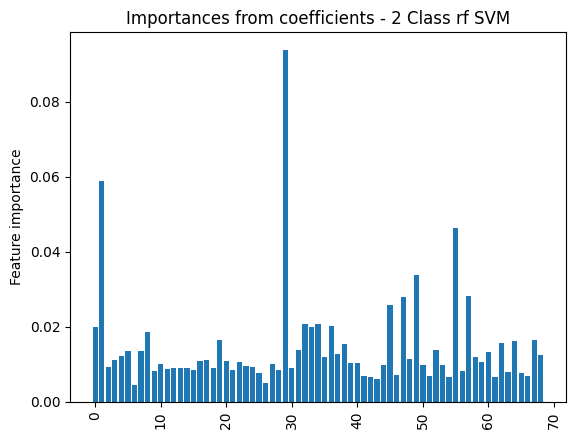

In [38]:
# Import SVC 
from sklearn.svm import SVC 
# Random forest model for Genotype class
model_rf_g = RandomForestClassifier( max_depth = 30, max_features = 6)
model_rf_g.fit(data_X_arr, np.ravel(data_Y_geno_arr))
# Print the importance scores
importance_scores_rf_g = model_rf_g.feature_importances_
#print(importance_scores_rf_g)

# Create dataframe with feature name and its importance as its two column
imp_feature_rf_g = pd.DataFrame(data={
    'Features': feature_names,
    'Importance': importance_scores_rf_g
})
display(imp_feature_rf_g)
plt.bar(x = imp_feature_rf_g['Features'], height = imp_feature_rf_g['Importance'])
plt.title('Importances from coefficients - 2 Class rf SVM')
plt.xticks(rotation='vertical')
plt.ylabel('Feature importance')
plt.show()

Treatment Behavior

Features  Importance
0          0    0.026745
1          1    0.005952
2          2    0.004084
3          3    0.005392
4          4    0.002469
5          5    0.014476
6          6    0.007153
7          7    0.033758
8          8    0.005349
9          9    0.012017
10        10    0.050493
11        11    0.011006
12        12    0.006880
13        13    0.010623
14        14    0.007329
15        15    0.003492
16        16    0.025822
17        17    0.006385
18        18    0.006048
19        19    0.016803
20        20    0.004846
21        21    0.004645
22        22    0.006073
23        23    0.004857
24        24    0.007421
25        25    0.007036
26        26    0.004880
27        27    0.002817
28        28    0.004312
29        29    0.003835
30        30    0.002154
31        31    0.111531
32        32    0.007793
33        33    0.027961
34        34    0.016882
35        35    0.018689
36        36    0.004707
37        37    0.005740
38        38    0.037087
39        39    0.005722
40        40    0.006982
41        41    0.021894
42        42    0.012503
43        43    0.007958
44        44    0.020334
45        45    0.033798
46        46    0.009485
47        47    0.014093
48        48    0.006187
49        49    0.007883
50        50    0.012838
51        51    0.014146
52        52    0.011368
53        53    0.005975
54        54    0.016784
55        55    0.009709
56        56    0.008668
57        57    0.015490
58        58    0.005725
59        59    0.020719
60        60    0.006609
61        61    0.008205
62        62    0.009905
63        63    0.017840
64        64    0.037737
65        65    0.006027
66        66    0.005562
67        67    0.011542
68        68    0.082768

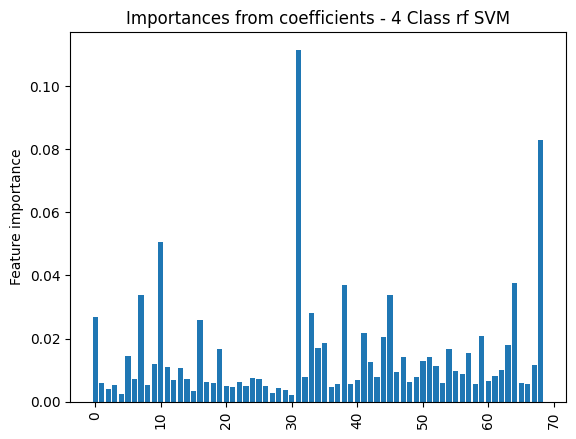

In [39]:
# Import SVC 
from sklearn.svm import SVC 
# Random forest model for treatment behavior class
model_rf_t = RandomForestClassifier( max_depth = 24, max_features = 10)
model_rf_t.fit(data_X_arr, np.ravel(data_Y_treat_arr))
# Print the importance scores
importance_scores_rf_t = model_rf_t.feature_importances_
#print(importance_scores_rf_t)

# Create dataframe with feature name and its importance as its two column
imp_feature_rf_t = pd.DataFrame(data={
    'Features': feature_names,
    'Importance': importance_scores_rf_t
})
display(imp_feature_rf_t)
plt.bar(x = imp_feature_rf_t['Features'], height = imp_feature_rf_t['Importance'])
plt.title('Importances from coefficients - 4 Class rf SVM')
plt.xticks(rotation='vertical')
plt.ylabel('Feature importance')
plt.show()

#Q7. See if removing some features systematically will improve your models (e.g. using recursive feature elimination https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html). 

In [40]:
# Import RFECV for feature selection
# Source : Using given link
# Recursive feature elimination with cross-validation to select features
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

#a.For linear SVM

For Genotype class

In [41]:
# Linear SVM model for Genotype class
estimator_svm_g = SVC(C =  0.41578947368, kernel = 'linear')
feature_selector_svm_g = RFECV(estimator_svm_g, cv=5, scoring='f1')
feature_selector_svm_g = feature_selector_svm_g.fit(data_X_arr, np.ravel(data_Y_geno_arr))
estimator_svm_g.fit(data_X_arr, np.ravel(data_Y_geno_arr))

# Check performance of new and old model
print("Number of features before reduction :", len(feature_names)) 
print("f1 score before reduction :", str(f1_score(data_Y_geno_arr, estimator_svm_g.predict(data_X_arr))))
print("Number of features left after reduction :", str(feature_selector_svm_g.n_features_))
print("f1 score after reduction :", str(f1_score(data_Y_geno_arr, feature_selector_svm_g.predict(data_X_arr))))


Number of features before reduction : 69
f1 score before reduction : 0.9892802450229708
Number of features left after reduction : 49
f1 score after reduction : 0.9892802450229708


For treatment behavior class(multiclass)

In [42]:
# Linear SVM model for Treatment Behavior class
estimator_svm_t = SVC(C = 0.1, kernel = 'linear')
feature_selector_svm_t = RFECV(estimator_svm_t, cv=5, scoring='balanced_accuracy')
feature_selector_svm_t = feature_selector_svm_t.fit(data_X_arr, np.ravel(data_Y_treat_arr))
estimator_svm_t.fit(data_X_arr, np.ravel(data_Y_treat_arr))

# Check performance of new and old model
print("Number of features before reduction :", len(feature_names)) 
print("Accuracy before reduction :", str(balanced_accuracy_score(data_Y_treat_arr, estimator_svm_t.predict(data_X_arr))))
print("Number of features left after reduction :", str(feature_selector_svm_t.n_features_))
print("Accuracy after reduction :", str(balanced_accuracy_score(data_Y_treat_arr, feature_selector_svm_t.predict(data_X_arr))))


Number of features before reduction : 69
Accuracy before reduction : 0.9972222222222222
Number of features left after reduction : 64
Accuracy after reduction : 0.9986111111111111


We can see that removing some features improved accuracy.

#b.For RBF Kernel

the RBF kernel does not have an intrinsic measure of feature importance. Thus, it is not compatible with RFECV. Same is the case with NN.

For Genotype Class

In [43]:
# Import SVC 
from sklearn.svm import SVC 
# RBF kernel model for Genotype class
model_rbf_g_7 = SVC(C = 1.1526315789473685, kernel = 'rbf', gamma = 0.1)
model_rbf_g_7.fit(data_X_arr, np.ravel(data_Y_geno_arr))
# Calculate permutation feature importance(Reference: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)
result_rbf_g_7 = permutation_importance(model_rbf_g_7, data_X_arr, data_Y_geno_arr, scoring = 'f1')
# Print the importance scores
importance_scores_rbf_g_7 = result_rbf_g_7.importances_mean.argsort()[::-1]
#print(importance_scores_rbf_g)

# Reference - Ronil Mandavia(20D180020)# Define a list of no. of features to test
features_test = np.array(range(2,50,2))

# Loop over feature features_test and test each subset
for features_test in features_test:
    # Create a subset of the X data with the top no. of features to test
    subset_imp_X = importance_scores_rbf_g_7[:features_test]
    subset_X = data_X_arr[:, subset_imp_X]

    # Split the subset into training and testing sets with a 80-20 ratio
    # Source : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
    from sklearn.model_selection import ShuffleSplit
    split  = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    for train_index, test_index in rs.split(subset_X):
      X_train_subset, X_test_subset = subset_X[train_index], subset_X[text_index]

    # Initialize a new support vector classifier with the same hyperparameters as before
    SVC_rbf_g = SVC(C = 1.1526315789473685, kernel = 'rbf', gamma = 0.1)

    # Fit the classifier to the training subset
    SVC_rbf_g = SVC_rbf_g.fit(X_train_subset, np.ravel(G_Y_train))

    # Evaluate the classifier on the training subset
    train_predictions = SVC_rbf_g.predict(X_train_subset)
    train_report = classification_report(G_Y_train, train_predictions)
    print(f"Classification report for training subset with {features_test} features:\n{train_report}")

    # Evaluate the classifier on the testing subset
    test_predictions = SVC_rbf_g.predict(X_test_subset)
    test_report = classification_report(G_Y_test, test_predictions)
    print(f"Classification report for testing subset with {features_test} features:\n{test_report}")


Classification report for training subset with 2 features:
              precision    recall  f1-score   support

         0.0       0.68      0.93      0.79       332
         1.0       0.80      0.39      0.53       239

    accuracy                           0.71       571
   macro avg       0.74      0.66      0.66       571
weighted avg       0.73      0.71      0.68       571

Classification report for testing subset with 2 features:
              precision    recall  f1-score   support

         0.0       0.63      0.96      0.76       103
         1.0       0.88      0.34      0.49        88

    accuracy                           0.68       191
   macro avg       0.76      0.65      0.63       191
weighted avg       0.75      0.68      0.64       191

Classification report for training subset with 4 features:
              precision    recall  f1-score   support

         0.0       0.70      0.93      0.80       332
         1.0       0.82      0.44      0.57       239

    ac

For Treatment Behavior class

In [44]:
# Import SVC 
from sklearn.svm import SVC 
from sklearn.metrics import balanced_accuracy_score
# RBF kernel model for Genotype class
model_rbf_t_7 = SVC(C = 1.0473684210526315, kernel = 'rbf', gamma = 0.1)
model_rbf_t_7.fit(data_X_arr, np.ravel(data_Y_treat_arr))
# Calculate permutation feature importance(Reference: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)
result_rbf_t_7 = permutation_importance(model_rbf_t_7, data_X_arr, data_Y_treat_arr, scoring = 'balanced_accuracy')
# Print the importance scores
importance_scores_rbf_t_7 = result_rbf_t_7.importances_mean.argsort()[::-1]
#print(importance_scores_rbf_g)

# Define a list of no. of features to test
features_test = np.array(range(2,50,2))

# Loop over feature features_test and test each subset
for features_test in features_test:
    # Create a subset of the X data with the top no. of features to test
    subset_imp_X = importance_scores_rbf_t_7[:features_test]
    subset_X = data_X_arr[:, subset_imp_X]

    # Split the subset into training and testing sets with a 80-20 ratio
    # Source : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
    from sklearn.model_selection import ShuffleSplit
    split  = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    for train_index, test_index in rs.split(subset_X):
      X_train_subset, X_test_subset = subset_X[train_index], subset_X[text_index]

    # Initialize a new support vector classifier with the same hyperparameters as before
    SVC_rbf_t = SVC(C = 1.0473684210526315, kernel = 'rbf', gamma = 0.1)

    # Fit the classifier to the training subset
    SVC_rbf_t = SVC_rbf_t.fit(X_train_subset, np.ravel(TB_Y_train))

    # Evaluate the classifier on the training subset
    train_predictions = SVC_rbf_t.predict(X_train_subset)
    print(f"Balanced Accuracy for training subset with {features_test} features:\n{balanced_accuracy_score(TB_Y_train, train_predictions)}")

    # Evaluate the classifier on the testing subset
    test_predictions = SVC_rbf_t.predict(X_test_subset)
    print(f"Balanced Accuracy for testing subset with {features_test} features:\n{balanced_accuracy_score(TB_Y_test, test_predictions)}")


Balanced Accuracy for training subset with 2 features:
0.3685292850990526
Balanced Accuracy for testing subset with 2 features:
0.33114994282447113
Balanced Accuracy for training subset with 4 features:
0.5644716189377923
Balanced Accuracy for testing subset with 4 features:
0.5241260744638583
Balanced Accuracy for training subset with 6 features:
0.6325443999753787
Balanced Accuracy for testing subset with 6 features:
0.6026692613696931
Balanced Accuracy for training subset with 8 features:
0.7817150435248308
Balanced Accuracy for testing subset with 8 features:
0.7450064080200793
Balanced Accuracy for training subset with 10 features:
0.8934984195057569
Balanced Accuracy for testing subset with 10 features:
0.8626360947175626
Balanced Accuracy for training subset with 12 features:
0.9482750336344417
Balanced Accuracy for testing subset with 12 features:
0.9387591941157659
Balanced Accuracy for training subset with 14 features:
0.9503411493369209
Balanced Accuracy for testing subset w

#c.For NN

In [45]:
# NN model for Genotype class
model_NN_g_7 = MLPClassifier(hidden_layer_sizes=(200,), activation='relu',alpha=0.001, max_iter = 500)
model_NN_g_7.fit(data_X_arr, np.ravel(data_Y_geno_arr))
# Calculate permutation feature importance
result_NN_g_7 = permutation_importance(model_NN_g_7, data_X_arr, data_Y_geno_arr, scoring = 'f1')
# Print the importance scores
importance_scores_NN_g_7 = result_NN_g_7.importances_mean.argsort()[::-1]

# Define a list of no. of features to test
features_test = np.array(range(2,50,2))

# Loop over feature features_test and test each subset
for features_test in features_test:
    # Create a subset of the X data with the top no. of features to test
    subset_imp_X = importance_scores_NN_g_7[:features_test]
    subset_X = data_X_arr[:, subset_imp_X]

    # Split the subset into training and testing sets with a 80-20 ratio
    # Source : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
    from sklearn.model_selection import ShuffleSplit
    split  = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    for train_index, test_index in rs.split(subset_X):
      X_train_subset, X_test_subset = subset_X[train_index], subset_X[text_index]

    # Initialize a new support vector classifier with the same hyperparameters as before
    NN_g = MLPClassifier(hidden_layer_sizes=(200,), activation='relu',alpha=0.001, max_iter = 500)

    # Fit the classifier to the training subset
    NN_g = NN_g.fit(X_train_subset, np.ravel(G_Y_train))

    # Evaluate the classifier on the training subset
    train_predictions = NN_g.predict(X_train_subset)
    train_report = classification_report(G_Y_train, train_predictions)
    print(f"Classification report for training subset with {features_test} features:\n{train_report}")

    # Evaluate the classifier on the testing subset
    test_predictions = NN_g.predict(X_test_subset)
    test_report = classification_report(G_Y_test, test_predictions)
    print(f"Classification report for testing subset with {features_test} features:\n{test_report}")



Classification report for training subset with 2 features:
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       332
         1.0       0.79      0.69      0.74       239

    accuracy                           0.80       571
   macro avg       0.80      0.78      0.79       571
weighted avg       0.80      0.80      0.79       571

Classification report for testing subset with 2 features:
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       103
         1.0       0.84      0.76      0.80        88

    accuracy                           0.82       191
   macro avg       0.82      0.82      0.82       191
weighted avg       0.82      0.82      0.82       191



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification report for training subset with 4 features:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       332
         1.0       0.90      0.82      0.86       239

    accuracy                           0.89       571
   macro avg       0.89      0.88      0.88       571
weighted avg       0.89      0.89      0.89       571

Classification report for testing subset with 4 features:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       103
         1.0       0.87      0.78      0.83        88

    accuracy                           0.85       191
   macro avg       0.85      0.84      0.85       191
weighted avg       0.85      0.85      0.85       191



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification report for training subset with 6 features:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       332
         1.0       0.97      0.94      0.95       239

    accuracy                           0.96       571
   macro avg       0.96      0.96      0.96       571
weighted avg       0.96      0.96      0.96       571

Classification report for testing subset with 6 features:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       103
         1.0       0.92      0.89      0.90        88

    accuracy                           0.91       191
   macro avg       0.91      0.91      0.91       191
weighted avg       0.91      0.91      0.91       191

Classification report for training subset with 8 features:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       332
         1.0       1.00      1.00      1.00       239

    ac

For treatment behavior

In [46]:
# NN model for treatment behavior class
model_NN_t_7 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',alpha=0.0001, max_iter = 500)
model_NN_t_7.fit(data_X_arr, np.ravel(data_Y_geno_arr))
# Calculate permutation feature importance
result_NN_t_7 = permutation_importance(model_NN_t_7, data_X_arr, data_Y_treat_arr, scoring = 'balanced_accuracy')
# Print the importance scores
importance_scores_NN_t_7 = result_NN_t_7.importances_mean.argsort()[::-1]

# Define a list of no. of features to test
features_test = np.array(range(2,50,2))

# Loop over feature features_test and test each subset
for features_test in features_test:
    # Create a subset of the X data with the top no. of features to test
    subset_imp_X = importance_scores_NN_t_7[:features_test]
    subset_X = data_X_arr[:, subset_imp_X]

    # Split the subset into training and testing sets with a 80-20 ratio
    # Source : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
    from sklearn.model_selection import ShuffleSplit
    split  = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    for train_index, test_index in rs.split(subset_X):
      X_train_subset, X_test_subset = subset_X[train_index], subset_X[text_index]

    # Initialize a new support vector classifier with the same hyperparameters as before
    NN_t = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',alpha=0.0001, max_iter = 500)

    # Fit the classifier to the training subset
    NN_t = NN_t.fit(X_train_subset, np.ravel(TB_Y_train))

    # Evaluate the classifier on the training subset
    train_predictions = NN_t.predict(X_train_subset)
    print(f"Balanced Accuracy for training subset with {features_test} features:\n{balanced_accuracy_score(TB_Y_train, train_predictions)}")

    # Evaluate the classifier on the testing subset
    test_predictions = NN_t.predict(X_test_subset)
    print(f"Balanced Accuracy for testing subset with {features_test} features:\n{balanced_accuracy_score(TB_Y_test, test_predictions)}")


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Balanced Accuracy for training subset with 2 features:
0.4754589745651181
Balanced Accuracy for testing subset with 2 features:
0.522974932406896


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Balanced Accuracy for training subset with 4 features:
0.6314489723751632
Balanced Accuracy for testing subset with 4 features:
0.5684790219108256


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Balanced Accuracy for training subset with 6 features:
0.868915835174696
Balanced Accuracy for testing subset with 6 features:
0.7992481781356902


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Balanced Accuracy for training subset with 8 features:
0.9777552501343074
Balanced Accuracy for testing subset with 8 features:
0.9002121672432674


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Balanced Accuracy for training subset with 10 features:
0.9923481645204689
Balanced Accuracy for testing subset with 10 features:
0.8907782049791164


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Balanced Accuracy for training subset with 12 features:
1.0
Balanced Accuracy for testing subset with 12 features:
0.9454632065780931


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Balanced Accuracy for training subset with 14 features:
1.0
Balanced Accuracy for testing subset with 14 features:
0.9736168851934761
Balanced Accuracy for training subset with 16 features:
1.0
Balanced Accuracy for testing subset with 16 features:
0.9905660377358491
Balanced Accuracy for training subset with 18 features:
1.0
Balanced Accuracy for testing subset with 18 features:
0.9952830188679245
Balanced Accuracy for training subset with 20 features:
1.0
Balanced Accuracy for testing subset with 20 features:
0.9863287496002558
Balanced Accuracy for training subset with 22 features:
1.0
Balanced Accuracy for testing subset with 22 features:
0.9952830188679245
Balanced Accuracy for training subset with 24 features:
1.0
Balanced Accuracy for testing subset with 24 features:
0.9957627118644068
Balanced Accuracy for training subset with 26 features:
1.0
Balanced Accuracy for testing subset with 26 features:
0.9957627118644068
Balanced Accuracy for training subset with 28 features:
1.0
Ba

#d.Random forest

In [47]:
# Random Forest model for Genotype class
estimator_rf_g = RandomForestClassifier( max_depth = 30, max_features = 6)
feature_selector_rf_g = RFECV(estimator_rf_g, cv=5, scoring='f1')
feature_selector_rf_g = feature_selector_rf_g.fit(data_X_arr, np.ravel(data_Y_geno_arr))
estimator_rf_g.fit(data_X_arr, np.ravel(data_Y_geno_arr))

# Check performance of new and old model
print("Number of features before reduction :", len(feature_names)) 
print("f1 score before reduction :", str(f1_score(data_Y_geno_arr, estimator_rf_g.predict(data_X_arr))))
print("Number of features left after reduction :", str(feature_selector_rf_g.n_features_))
print("f1 score after reduction :", str(f1_score(data_Y_geno_arr, feature_selector_rf_g.predict(data_X_arr))))


Number of features before reduction : 69
f1 score before reduction : 1.0
Number of features left after reduction : 3
f1 score after reduction : 1.0


For treatment behavior class

In [48]:
# Random forest model for Treatment Behavior class
estimator_rf_t = SVC(C = 0.1, kernel = 'linear')
feature_selector_rf_t = RFECV(estimator_rf_t, cv=5, scoring='balanced_accuracy')
feature_selector_rf_t = feature_selector_rf_t.fit(data_X_arr, np.ravel(data_Y_treat_arr))
estimator_rf_t.fit(data_X_arr, np.ravel(data_Y_treat_arr))

# Check performance of new and old model
print("Number of features before reduction :", len(feature_names)) 
print("Accuracy before reduction :", str(balanced_accuracy_score(data_Y_treat_arr, estimator_rf_t.predict(data_X_arr))))
print("Number of features left after reduction :", str(feature_selector_rf_t.n_features_))
print("Accuracy after reduction :", str(balanced_accuracy_score(data_Y_treat_arr, feature_selector_rf_t.predict(data_X_arr))))


Number of features before reduction : 69
Accuracy before reduction : 0.9972222222222222
Number of features left after reduction : 64
Accuracy after reduction : 0.9986111111111111


#Q8.Finally, test a few promising models on the test data:
https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv

In [49]:
test_url = 'https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv'
test_data = pd.read_csv(test_url)

#Data Analysis

Performing same data analysis as I did before.

In [50]:
# Basic Information of test data
test_df = test_data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            225 non-null    float64
 1   ITSN1_N             225 non-null    float64
 2   BDNF_N              225 non-null    float64
 3   NR1_N               225 non-null    float64
 4   NR2A_N              225 non-null    float64
 5   pAKT_N              225 non-null    float64
 6   pBRAF_N             225 non-null    float64
 7   pCAMKII_N           225 non-null    float64
 8   pCREB_N             225 non-null    float64
 9   pELK_N              225 non-null    float64
 10  pERK_N              225 non-null    float64
 11  pJNK_N              225 non-null    float64
 12  PKCA_N              225 non-null    float64
 13  pMEK_N              225 non-null    float64
 14  pNR1_N              225 non-null    float64
 15  pNR2A_N             225 non-null    float64
 16  pNR2B_N 

We can see that all the features are real-valued. The classes, however needs to be one-hot encoded.

In [51]:
# Source: YOutube lecture video by Prof. Amit Sethi
for col in test_df.columns.values: # For each column
  unique_vals = pd.unique(test_df[col]) # Create a list of unique values
  # Calculate number of NaN entries and uniquevalues in a column
  print(col + ':' + str(len(unique_vals)) + ' unique values, ' + str(test_df[col].isna().sum()) + " NaN entries")

DYRK1A_N:225 unique values, 0 NaN entries
ITSN1_N:225 unique values, 0 NaN entries
BDNF_N:225 unique values, 0 NaN entries
NR1_N:225 unique values, 0 NaN entries
NR2A_N:225 unique values, 0 NaN entries
pAKT_N:225 unique values, 0 NaN entries
pBRAF_N:225 unique values, 0 NaN entries
pCAMKII_N:225 unique values, 0 NaN entries
pCREB_N:225 unique values, 0 NaN entries
pELK_N:225 unique values, 0 NaN entries
pERK_N:225 unique values, 0 NaN entries
pJNK_N:225 unique values, 0 NaN entries
PKCA_N:225 unique values, 0 NaN entries
pMEK_N:225 unique values, 0 NaN entries
pNR1_N:225 unique values, 0 NaN entries
pNR2A_N:225 unique values, 0 NaN entries
pNR2B_N:225 unique values, 0 NaN entries
pPKCAB_N:225 unique values, 0 NaN entries
pRSK_N:225 unique values, 0 NaN entries
AKT_N:225 unique values, 0 NaN entries
BRAF_N:225 unique values, 0 NaN entries
CAMKII_N:225 unique values, 0 NaN entries
CREB_N:225 unique values, 0 NaN entries
ELK_N:225 unique values, 0 NaN entries
ERK_N:225 unique values, 0 Na

 We will drop the columns with large no. of NaN entries ( these columns are BAD_N, BCL2_N, pCFOS_N, H3AcK18_N, EGR1_N, H3MeK4_N).

In [52]:
# Drop Variables
test_df.drop(['BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'], inplace=True, axis = 1)
test_df.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.627582  0.954187  0.446958  2.930717  5.915039  0.197897  0.185599   
1  0.651253  0.962021  0.464964  2.992689  5.975028  0.202810  0.188473   
2  0.644346  0.967179  0.470056  3.073847  5.927379  0.205131  0.182590   
3  0.568229  0.812018  0.393465  2.606780  5.808102  0.218211  0.179905   
4  0.587038  0.863728  0.411203  2.757975  6.006657  0.223688  0.189400   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   1.765115  0.232257  1.808111  1.022813  0.348667  0.348291  0.245963   
1   1.807824  0.259020  1.960691  1.053551  0.353874  0.362704  0.260634   
2   1.783552  0.258795  2.147883  1.025842  0.361690  0.368386  0.259549   
3   2.312324  0.209154  1.733692  0.906988  0.337290  0.335699  0.250643   
4   2.375283  0.218538  1.843255  0.917357  0.348531  0.354685  0.270284   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.083177  1.008637  2.128990  1.603736  0.361904  1.028539  0.534548   
1  1.122294  1.041018  2.196449  1.854728  0.365742  1.042822  0.550038   
2  1.135150  1.056588  2.238517  1.956427  0.379421  1.058568  0.555032   
3  0.959980  0.862196  1.949823  1.661241  0.374128  0.939909  0.493452   
4  1.006154  0.897262  1.998116  1.861593  0.378171  0.979277  0.502261   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.400676  0.175836  2.407811  4.643823  1.533421  0.271217  0.322475   
1  0.414831  0.180972  2.473889  4.892803  1.563331  0.275351  0.332985   
2  0.410921  0.191738  2.578233  4.804018  1.579742  0.283127  0.340375   
3  0.405948  0.175376  1.748134  4.039652  1.473626  0.267532  0.292498   
4  0.416101  0.182115  1.801306  4.089927  1.530897  0.275559  0.308591   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.887627  0.168044  0.442922    2.747559  0.358149  0.537646  0.383590   
1  0.892423  0.172902  0.462685    2.801842  0.395367  0.561717  0.394512   
2  0.892200  0.170895  0.459964    2.856078  0.383854  0.573140  0.402339   
3  0.810794  0.165830  0.406927    2.418431  0.342431  0.521478  0.392853   
4  0.831826  0.173700  0.422381    2.564557  0.360085  0.560035  0.409194   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.799380  0.645043  0.538303  0.709350  0.488265  0.368757  0.527037   
1  0.823205  0.678599  0.563521  0.776016  0.506551  0.388340  0.537125   
2  0.867207  0.730548  0.598416  0.740357  0.539470  0.405640  0.574932   
3  0.761351  0.639824  0.468364  0.678987  0.467752  0.354547  0.479134   
4  0.792514  0.694298  0.503014  0.724441  0.496232  0.387968  0.500879   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.214514  0.248877  1.223802  0.172713  0.605805  0.355595  0.676687   
1  0.234523  0.248038  1.216307  0.167280  0.612683  0.350499  0.637341   
2  0.235216  0.236124  1.200436  0.182244  0.603165  0.351726  0.590310   
3  0.202056  0.230263  1.151953  0.166145  0.724477  0.341942  0.598990   
4  0.217031  0.236062  1.149328  0.169222  0.731500  0.355993  0.576850   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.951281      0.135249  0.150501  0.202873  0.148773  0.185794  0.219754   
1  2.060217      0.130801  0.158657  0.205746  0.147660  0.189226  0.211704   
2  2.211110      0.122888  0.168043  0.208975  0.143169  0.182755  0.204102   
3  1.787828      0.124912  0.156875  0.202583  0.140063  0.181998  0.206738   
4  1.919602      0.124620  0.166624  0.209326  0.140775  0.183857  0.204004   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.353719  0.119354  0.220791  0.124735  0.571351  0.303668  1.788785   
1  0.343087  0.124939  0.215580  0.121597  0.569082  0.320415  1.763879   
2  0.335484  0.120614  0.200900  0.124838  0.537034  0.313997  1.672823   
3  0.292974  0.122611  0.207313  0.117113  0.571438  

#One Hot encoding

One hot Encoding using predefined method in pandas

In [53]:
# perform one hot encoding on the 'Genotype' and 'Treatment_Behavior' columns of the test_df dataframe
en_genotype = pd.get_dummies(test_df.Genotype, prefix='gen')
en_treatment = pd.get_dummies(test_df.Treatment_Behavior, prefix='treat')

# concatenate the two encoded dataframes along the columns axis (axis=1)
# reset_index(drop=True) resets the index of the resulting dataframe and drops the old index
temp_data_test = pd.concat([en_genotype.reset_index(drop=True), en_treatment.reset_index(drop=True)], axis=1)

# concatenate the original test_df dataframe and the temp_data_test dataframe (which contains the encoded columns)
test_df= pd.concat([test_df.reset_index(drop=True), temp_data_test.reset_index(drop=True)], axis=1)
# drop the original 'Genotype' and 'Treatment_Behavior' columns from the resulting dataframe
# inplace=True modifies the dataframe in place instead of creating a new dataframe
test_df.drop(['Genotype', 'Treatment_Behavior'], inplace=True, axis=1)

# display the first few rows of the resulting dataframe
test_df.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.627582  0.954187  0.446958  2.930717  5.915039  0.197897  0.185599   
1  0.651253  0.962021  0.464964  2.992689  5.975028  0.202810  0.188473   
2  0.644346  0.967179  0.470056  3.073847  5.927379  0.205131  0.182590   
3  0.568229  0.812018  0.393465  2.606780  5.808102  0.218211  0.179905   
4  0.587038  0.863728  0.411203  2.757975  6.006657  0.223688  0.189400   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   1.765115  0.232257  1.808111  1.022813  0.348667  0.348291  0.245963   
1   1.807824  0.259020  1.960691  1.053551  0.353874  0.362704  0.260634   
2   1.783552  0.258795  2.147883  1.025842  0.361690  0.368386  0.259549   
3   2.312324  0.209154  1.733692  0.906988  0.337290  0.335699  0.250643   
4   2.375283  0.218538  1.843255  0.917357  0.348531  0.354685  0.270284   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.083177  1.008637  2.128990  1.603736  0.361904  1.028539  0.534548   
1  1.122294  1.041018  2.196449  1.854728  0.365742  1.042822  0.550038   
2  1.135150  1.056588  2.238517  1.956427  0.379421  1.058568  0.555032   
3  0.959980  0.862196  1.949823  1.661241  0.374128  0.939909  0.493452   
4  1.006154  0.897262  1.998116  1.861593  0.378171  0.979277  0.502261   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.400676  0.175836  2.407811  4.643823  1.533421  0.271217  0.322475   
1  0.414831  0.180972  2.473889  4.892803  1.563331  0.275351  0.332985   
2  0.410921  0.191738  2.578233  4.804018  1.579742  0.283127  0.340375   
3  0.405948  0.175376  1.748134  4.039652  1.473626  0.267532  0.292498   
4  0.416101  0.182115  1.801306  4.089927  1.530897  0.275559  0.308591   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.887627  0.168044  0.442922    2.747559  0.358149  0.537646  0.383590   
1  0.892423  0.172902  0.462685    2.801842  0.395367  0.561717  0.394512   
2  0.892200  0.170895  0.459964    2.856078  0.383854  0.573140  0.402339   
3  0.810794  0.165830  0.406927    2.418431  0.342431  0.521478  0.392853   
4  0.831826  0.173700  0.422381    2.564557  0.360085  0.560035  0.409194   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.799380  0.645043  0.538303  0.709350  0.488265  0.368757  0.527037   
1  0.823205  0.678599  0.563521  0.776016  0.506551  0.388340  0.537125   
2  0.867207  0.730548  0.598416  0.740357  0.539470  0.405640  0.574932   
3  0.761351  0.639824  0.468364  0.678987  0.467752  0.354547  0.479134   
4  0.792514  0.694298  0.503014  0.724441  0.496232  0.387968  0.500879   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.214514  0.248877  1.223802  0.172713  0.605805  0.355595  0.676687   
1  0.234523  0.248038  1.216307  0.167280  0.612683  0.350499  0.637341   
2  0.235216  0.236124  1.200436  0.182244  0.603165  0.351726  0.590310   
3  0.202056  0.230263  1.151953  0.166145  0.724477  0.341942  0.598990   
4  0.217031  0.236062  1.149328  0.169222  0.731500  0.355993  0.576850   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.951281      0.135249  0.150501  0.202873  0.148773  0.185794  0.219754   
1  2.060217      0.130801  0.158657  0.205746  0.147660  0.189226  0.211704   
2  2.211110      0.122888  0.168043  0.208975  0.143169  0.182755  0.204102   
3  1.787828      0.124912  0.156875  0.202583  0.140063  0.181998  0.206738   
4  1.919602      0.124620  0.166624  0.209326  0.140775  0.183857  0.204004   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.353719  0.119354  0.220791  0.124735  0.571351  0.303668  1.788785   
1  0.343087  0.124939  0.215580  0.121597  0.569082  0.320415  1.763879   
2  0.335484  0.120614  0.200900  0.124838  0.537034  0.313997  1.672823   
3  0.292974  0.122611  0.207313  0.117113  0.571438  

#Imputation

In [54]:
# Impute variables: giving values to missing variables
# Source: https://scikit-learn.org/stable/modules/impute.html (link given by Prof in assignment)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=20, random_state=0)
imp.fit(test_df)

#Imputed dataframe
imp_data_test = pd.DataFrame(data = imp.transform(test_df), columns = test_df.columns[:])

#checking if the NaN entries have been eliminated
for col in imp_data_test.columns.values:
    unique_vals_n = pd.unique(imp_data_test[col])
    print(col + " : " + str(len(unique_vals_n)) +" values, " + str(imp_data_test[col].isna().sum()) + " NaN entries")

DYRK1A_N : 225 values, 0 NaN entries
ITSN1_N : 225 values, 0 NaN entries
BDNF_N : 225 values, 0 NaN entries
NR1_N : 225 values, 0 NaN entries
NR2A_N : 225 values, 0 NaN entries
pAKT_N : 225 values, 0 NaN entries
pBRAF_N : 225 values, 0 NaN entries
pCAMKII_N : 225 values, 0 NaN entries
pCREB_N : 225 values, 0 NaN entries
pELK_N : 225 values, 0 NaN entries
pERK_N : 225 values, 0 NaN entries
pJNK_N : 225 values, 0 NaN entries
PKCA_N : 225 values, 0 NaN entries
pMEK_N : 225 values, 0 NaN entries
pNR1_N : 225 values, 0 NaN entries
pNR2A_N : 225 values, 0 NaN entries
pNR2B_N : 225 values, 0 NaN entries
pPKCAB_N : 225 values, 0 NaN entries
pRSK_N : 225 values, 0 NaN entries
AKT_N : 225 values, 0 NaN entries
BRAF_N : 225 values, 0 NaN entries
CAMKII_N : 225 values, 0 NaN entries
CREB_N : 225 values, 0 NaN entries
ELK_N : 225 values, 0 NaN entries
ERK_N : 225 values, 0 NaN entries
GSK3B_N : 225 values, 0 NaN entries
JNK_N : 225 values, 0 NaN entries
MEK_N : 225 values, 0 NaN entries
TRKA_N : 22

Dropping highly correlated variables



In [55]:
# Print features to drop
print(feature_drop)

['pNR1_N', 'pS6_N']


In [56]:
test_df2 = pd.DataFrame(imp_data_test)
# Drop highly correlated variables
test_df2.drop(feature_drop, inplace = True, axis = 1)
test_df2.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.627582  0.954187  0.446958  2.930717  5.915039  0.197897  0.185599   
1  0.651253  0.962021  0.464964  2.992689  5.975028  0.202810  0.188473   
2  0.644346  0.967179  0.470056  3.073847  5.927379  0.205131  0.182590   
3  0.568229  0.812018  0.393465  2.606780  5.808102  0.218211  0.179905   
4  0.587038  0.863728  0.411203  2.757975  6.006657  0.223688  0.189400   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   1.765115  0.232257  1.808111  1.022813  0.348667  0.348291  0.245963   
1   1.807824  0.259020  1.960691  1.053551  0.353874  0.362704  0.260634   
2   1.783552  0.258795  2.147883  1.025842  0.361690  0.368386  0.259549   
3   2.312324  0.209154  1.733692  0.906988  0.337290  0.335699  0.250643   
4   2.375283  0.218538  1.843255  0.917357  0.348531  0.354685  0.270284   

    pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  CAMKII_N  \
0  1.008637  2.128990  1.603736  0.361904  1.028539  0.534548  0.400676   
1  1.041018  2.196449  1.854728  0.365742  1.042822  0.550038  0.414831   
2  1.056588  2.238517  1.956427  0.379421  1.058568  0.555032  0.410921   
3  0.862196  1.949823  1.661241  0.374128  0.939909  0.493452  0.405948   
4  0.897262  1.998116  1.861593  0.378171  0.979277  0.502261  0.416101   

     CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N    TRKA_N  \
0  0.175836  2.407811  4.643823  1.533421  0.271217  0.322475  0.887627   
1  0.180972  2.473889  4.892803  1.563331  0.275351  0.332985  0.892423   
2  0.191738  2.578233  4.804018  1.579742  0.283127  0.340375  0.892200   
3  0.175376  1.748134  4.039652  1.473626  0.267532  0.292498  0.810794   
4  0.182115  1.801306  4.089927  1.530897  0.275559  0.308591  0.831826   

      RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N   pMTOR_N  \
0  0.168044  0.442922    2.747559  0.358149  0.537646  0.383590  0.799380   
1  0.172902  0.462685    2.801842  0.395367  0.561717  0.394512  0.823205   
2  0.170895  0.459964    2.856078  0.383854  0.573140  0.402339  0.867207   
3  0.165830  0.406927    2.418431  0.342431  0.521478  0.392853  0.761351   
4  0.173700  0.422381    2.564557  0.360085  0.560035  0.409194  0.792514   

    DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  pP70S6_N  \
0  0.645043  0.538303  0.709350  0.488265  0.368757  0.527037  0.214514   
1  0.678599  0.563521  0.776016  0.506551  0.388340  0.537125  0.234523   
2  0.730548  0.598416  0.740357  0.539470  0.405640  0.574932  0.235216   
3  0.639824  0.468364  0.678987  0.467752  0.354547  0.479134  0.202056   
4  0.694298  0.503014  0.724441  0.496232  0.387968  0.500879  0.217031   

     NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  ADARB1_N  \
0  0.248877  1.223802  0.172713  0.605805  0.355595  0.676687  1.951281   
1  0.248038  1.216307  0.167280  0.612683  0.350499  0.637341  2.060217   
2  0.236124  1.200436  0.182244  0.603165  0.351726  0.590310  2.211110   
3  0.230263  1.151953  0.166145  0.724477  0.341942  0.598990  1.787828   
4  0.236062  1.149328  0.169222  0.731500  0.355993  0.576850  1.919602   

   AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N     Tau_N  \
0      0.135249  0.150501  0.202873  0.148773  0.185794  0.219754  0.353719   
1      0.130801  0.158657  0.205746  0.147660  0.189226  0.211704  0.343087   
2      0.122888  0.168043  0.208975  0.143169  0.182755  0.204102  0.335484   
3      0.124912  0.156875  0.202583  0.140063  0.181998  0.206738  0.292974   
4      0.124620  0.166624  0.209326  0.140775  0.183857  0.204004  0.301951   

     GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N   PSD95_N  \
0  0.119354  0.220791  0.124735  0.571351  0.303668  1.788785  2.221383   
1  0.124939  0.215580  0.121597  0.569082  0.320415  1.763879  2.215774   
2  0.120614  0.200900  0.124838  0.537034  0.313997  1.672823  2.098199   
3  0.122611  0.207313  0.117113  0.571438  0.292143  

#Normalizing Data

In [57]:
# Normalize data(shift and scale so that columns are zero mean and unit variance)
# Source: Youtube lecture video by Prof. Amit Sethi
scaler = sklearn.preprocessing.StandardScaler() # For data normalization

test_df3 = scaler.fit(test_df2[test_df2.columns[:-6]]) # Compute mean and std
test_X = pd.DataFrame(scaler.transform(test_df2[test_df2.columns[:-6]])) #normalized training data
test_Y_genotype = pd.DataFrame(test_df2[test_df2.columns[-6:-4]]) #classification based on genotype
test_Y_treat_behav = pd.DataFrame(test_df2[test_df2.columns[-4:]]) #classification based on treatment_behaviour

# Display few rows of text_X
test_X.head()

0         1         2         3         4         5         6   \
0  1.100803  1.740822  2.583259  1.974701  2.394221 -0.582594  0.365164   
1  1.225392  1.779810  2.915630  2.144586  2.459251 -0.467399  0.462236   
2  1.189037  1.805485  3.009620  2.367066  2.407598 -0.413003  0.263538   
3  0.788419  1.033239  1.595803  1.086687  2.278297 -0.106337  0.172848   
4  0.887416  1.290601  1.923244  1.501161  2.493537  0.022067  0.493524   

         7         8         9         10        11        12        13  \
0 -1.376292  0.822835  1.063762  1.652187  0.799950  0.795188 -0.324707   
1 -1.332976  1.602315  1.480666  1.761931  0.891099  1.060826 -0.034160   
2 -1.357593  1.595749  1.992142  1.663002  1.027922  1.165553 -0.055649   
3 -0.821312  0.149973  0.860422  1.238664  0.600804  0.563109 -0.232037   
4 -0.757459  0.423275  1.159789  1.275686  0.797563  0.913023  0.156942   

         14        15        16        17        18        19        20  \
0  1.259843  2.268557  0.221185 -0.924215  2.504475  1.079626  0.965036   
1  1.413942  2.519779  0.719155 -0.868393  2.605096  1.180962  1.219912   
2  1.488038  2.676444  0.920926 -0.669482  2.716029  1.213630  1.149517   
3  0.562941  1.601328  0.335275 -0.746451  1.880080  0.810790  1.059963   
4  0.729819  1.781176  0.732773 -0.687654  2.157421  0.868412  1.242789   

         21        22        23        24        25        26        27  \
0  0.120724  3.684973  3.114633  1.698629  1.137736  1.361174  1.834461   
1  0.288183  3.875801  3.465867  1.832798  1.254215  1.589483  1.873087   
2  0.639154  4.177135  3.340618  1.906413  1.473280  1.750012  1.871293   
3  0.105754  1.779887  2.262336  1.430403  1.033919  0.710019  1.215701   
4  0.325438  1.933445  2.333258  1.687306  1.260063  1.059589  1.385079   

         28        29        30        31        32        33        34  \
0  0.281870  0.822953  1.658282 -0.622188  1.329352 -0.355779  0.424082   
1  0.445067  1.142192  1.787491 -0.521344  1.693589 -0.214760  0.636345   
2  0.377659  1.098240  1.916591 -0.552539  1.866439 -0.113703  1.028369   
3  0.207523  0.241537  0.874855 -0.664777  1.084715 -0.236183  0.085270   
4  0.471889  0.491169  1.222679 -0.616940  1.668145 -0.025199  0.362912   

         35        36        37        38        39        40        41  \
0  0.752932  2.829672  1.951949  2.237668  1.090900  2.039402 -1.133592   
1  1.132145  3.230890  2.780677  2.524942  1.444134  2.206403 -0.973223   
2  1.719230  3.786067  2.337390  3.042083  1.756178  2.832286 -0.967668   
3  0.693947  1.716945  1.574494  1.915409  0.834577  1.246365 -1.233435   
4  1.309565  2.268235  2.139544  2.362827  1.437416  1.606360 -1.113418   

         42        43        44        45        46        47        48  \
0  2.416570  1.554975  1.060699 -1.664549  1.353952  1.783388  1.575380   
1  2.387397  1.511980  0.700447 -1.652499  1.254604  1.505815  1.832790   
2  1.973168  1.420944  1.692668 -1.669174  1.278533  1.174020  2.189342   
3  1.769381  1.142831  0.625142 -1.456647  1.087787  1.235255  1.189151   
4  1.971006  1.127776  0.829196 -1.444343  1.361719  1.079063  1.500525   

         49        50        51        52        53        54        55  \
0 -0.440747 -0.363574  1.265254  2.198671  2.442329  1.619137  3.388026   
1 -0.491132 -0.093351  1.406651  2.111312  2.719291  1.305800  3.161261   
2 -0.580780  0.217631  1.565619  1.758871  2.197058  1.009904  2.999098   
3 -0.557853 -0.152386  1.250972  1.515133  2.136012  1.112484  2.092475   
4 -0.561164  0.170617  1.582875  1.571069  2.286016  1.006073  2.283931   

         56        57        58        59        60        61        62  \
0 -0.014702  0.019297  0.015607  0.462427  0.482716  0.751545  0.102244   
1  0.443330 -0.156189 -0.071704  0.431673  1.084179  0.647649  0.077106   
2  0.088637 -0.650549  0.018470 -0.002790  0.853680  0.267803 -0.449784   
3  0.252354 -0.434584 -0.196458  0.463602  0.068838  0.178206  0.038619   
4  0.957481 -0.441478 -0.2

In [58]:
test_Y_genotype.head()

gen_Control  gen_Ts65Dn
0          1.0         0.0
1          1.0         0.0
2          1.0         0.0
3          1.0         0.0
4          1.0         0.0

In [59]:
test_Y_treat_behav.head()

treat_Memantine_C/S  treat_Memantine_S/C  treat_Saline_C/S  \
0                  1.0                  0.0               0.0   
1                  1.0                  0.0               0.0   
2                  1.0                  0.0               0.0   
3                  1.0                  0.0               0.0   
4                  1.0                  0.0               0.0   

   treat_Saline_S/C  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [60]:
# Encode the data into 0, 1 class numbers for Genotype
class_geno_test = test_Y_genotype.iloc[:,0]*0 + test_Y_genotype.iloc[:,1]*1
# Encode the data into 0, 1, 2, 3 class numbers for Treatment Behavior
class_treat_behav_test = test_Y_treat_behav.iloc[:,0]*0 + test_Y_treat_behav.iloc[:,1]*1 + test_Y_treat_behav.iloc[:,2]*2 + test_Y_treat_behav.iloc[:,3]*3

# concatenate the two encoded dataframes along the columns axis (axis=1)
# reset_index(drop=True) resets the index of the resulting dataframe and drops the old index
temp_data_test_1 = pd.concat([class_geno_test.reset_index(drop=True), class_treat_behav_test.reset_index(drop=True)], axis=1)

# concatenate the original data_read dataframe and the temp_data dataframe (which contains the encoded columns)
test_df2 = pd.concat([test_df2.reset_index(drop=True), temp_data_test_1.reset_index(drop=True)], axis=1)
# drop the all one hot encoded columns from the resulting dataframe and inplace of them added genotype and treatment behavior columns with entries 0, 1 and 0, 1, 2, 3 respectively
# inplace=True modifies the dataframe in place instead of creating a new dataframe
test_df2.drop(['gen_Control',	'gen_Ts65Dn',	'treat_Memantine_C/S',	'treat_Memantine_S/C',	'treat_Saline_C/S',	'treat_Saline_S/C'], inplace=True, axis=1)

# display the resulting dataframe
display(test_df2)

#Store new genotype class and treatment behavior class in new dataframe
test_Y_geno = pd.DataFrame(test_df2[test_df2.columns[-2]])
test_Y_treat = pd.DataFrame(test_df2[test_df2.columns[-1]])

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0    0.627582  0.954187  0.446958  2.930717  5.915039  0.197897  0.185599   
1    0.651253  0.962021  0.464964  2.992689  5.975028  0.202810  0.188473   
2    0.644346  0.967179  0.470056  3.073847  5.927379  0.205131  0.182590   
3    0.568229  0.812018  0.393465  2.606780  5.808102  0.218211  0.179905   
4    0.587038  0.863728  0.411203  2.757975  6.006657  0.223688  0.189400   
5    0.595904  0.861763  0.421204  2.831169  6.368257  0.233017  0.187687   
6    0.522918  0.721090  0.363541  2.456261  5.191732  0.229179  0.186639   
7    0.530855  0.748072  0.385529  2.573126  5.495063  0.237427  0.187596   
8    0.534999  0.773863  0.391588  2.667701  5.987583  0.246624  0.184541   
9    0.519443  0.736371  0.370568  2.503050  4.947198  0.266489  0.205299   
10   0.508590  0.735699  0.384369  2.545403  5.101001  0.257127  0.201057   
11   0.516538  0.737479  0.383670  2.624646  5.601210  0.259119  0.183897   
12   0.454421  0.685278  0.360301  2.392890  4.500000  0.278715  0.208751   
13   0.471746  0.697323  0.371540  2.472661  4.652025  0.278197  0.215511   
14   0.481273  0.684116  0.360785  2.538809  5.008123  0.287229  0.224504   
15   0.743409  1.025424  0.393315  2.802637  4.770716  0.243126  0.180885   
16   0.762443  1.025459  0.394525  2.953580  4.820444  0.245119  0.186256   
17   0.755979  1.013383  0.390471  2.972950  4.891420  0.247912  0.190015   
18   0.669722  0.911734  0.369172  2.754584  4.451807  0.259560  0.189366   
19   0.630001  0.839187  0.357777  2.651229  4.261675  0.253184  0.185257   
20   0.618551  0.869724  0.350834  2.705576  4.225769  0.256905  0.191767   
21   0.619721  0.739200  0.328569  2.493175  3.980568  0.259033  0.182753   
22   0.603723  0.723248  0.331195  2.433667  3.897372  0.272841  0.207603   
23   0.522925  0.757045  0.309216  2.437319  3.631074  0.269916  0.179132   
24   0.638367  0.716735  0.310204  2.286939  3.307143  0.255510  0.200612   
25   0.618440  0.691825  0.313193  2.379469  3.329082  0.255070  0.204474   
26   0.523578  0.701477  0.335357  2.283748  3.163125  0.262093  0.196924   
27   0.511770  0.678274  0.305297  2.210397  3.029671  0.293281  0.239823   
28   0.546646  0.679022  0.323752  2.288452  3.170197  0.281896  0.208270   
29   0.515372  0.681675  0.308158  2.190753  3.023239  0.272573  0.214476   
30   0.231924  0.410252  0.265468  2.386871  4.552428  0.216547  0.158993   
31   0.212311  0.400141  0.115181  2.284431  4.299313  0.209052  0.154368   
32   0.211927  0.394641  0.266897  2.261798  4.342351  0.208816  0.151513   
33   0.203736  0.349683  0.232139  2.032773  3.881145  0.204392  0.148023   
34   0.194417  0.348331  0.255172  2.044992  3.713300  0.196059  0.147893   
35   0.197589  0.350795  0.239452  2.044493  3.626740  0.201534  0.150247   
36   0.179263  0.321798  0.221029  1.880933  3.384381  0.194643  0.140016   
37   0.195425  0.316732  0.217386  1.806013  3.183399  0.205752  0.140392   
38   0.175965  0.319864  0.222237  1.837852  3.248827  0.193952  0.141293   
39   0.164330  0.290535  0.212387  1.670465  2.819603  0.170172  0.133947   
40   0.168493  0.292269  0.198159  1.634955  2.726874  0.179600  0.134006   
41   0.189803  0.332433  0.220140  1.792726  3.025095  0.199492  0.147078   
42   0.145327  0.245359  0.185980  1.403329  2.290973  0.164693  0.122759   
43   0.156849  0.261185  0.197271  1.496977  2.473830  0.169632  0.140266   
44   0.171823  0.299475  0.228644  1.687682  2.703833  0.186028  0.154894   
45   0.232403  0.395143  0.266725  2.037813  3.830570  0.219314  0.174811   
46   0.244818  0.405109  0.260000  2.074891  3.655474  0.220584  0.172993   
47   0.225440  0.364276  0.247091  1.866576  3.470636  0.214208  0.165765   
48   0.248641  0.381298  0.268394  1.977528  3.220551  0.236136  0.195904   
49   0.249192  0.397487  0.267684  1.966966  3.265530  0.226750  0.208079   
50   0.226575  0.351935  0.239207  1.712184  2.905660  0.216342  0.166453   
5

In [61]:
# Convert data into numpy arrays as all functions are defined for arrays
test_X_arr = np.array(test_X)
test_Y_geno_arr = np.array(test_Y_geno)
test_Y_treat_arr = np.array(test_Y_treat)

Testing the 4 models

#LinearSVM

In [62]:
# Check performance of model on test data]
print('Linear SVM')
print("f1 score for 2-Class Classification :", str(f1_score(test_Y_geno_arr, model_svm_g.predict(test_X_arr))))
print("Balanced Accuracy for 4-class classification :", str(balanced_accuracy_score(test_Y_treat_arr, model_svm_t.predict(test_X_arr))))

Linear SVM
f1 score for 2-Class Classification : 0.7647058823529413
Balanced Accuracy for 4-class classification : 0.8444444444444444


#For RBF kernel

In [63]:
# Check performance of model on test data
print('RBF Kernel')
print("f1 score for 2-Class Classification :", str(f1_score(test_Y_geno_arr, model_rbf_g.predict(test_X_arr))))
print("Balanced Accuracy for 4-class classification :", str(balanced_accuracy_score(test_Y_treat_arr, model_rbf_t.predict(test_X_arr))))

RBF Kernel
f1 score for 2-Class Classification : 0.4482758620689655
Balanced Accuracy for 4-class classification : 0.5597222222222222


#For NN

In [64]:
# Check performance of model on test data
print('Neural Network')
print("f1 score for 2-Class Classification :", str(f1_score(test_Y_geno_arr, model_NN_g.predict(test_X_arr))))
print("Balanced Accuracy for 4-class classification :", str(balanced_accuracy_score(test_Y_treat_arr, model_NN_t.predict(test_X_arr))))

Neural Network
f1 score for 2-Class Classification : 0.707070707070707
Balanced Accuracy for 4-class classification : 0.8680555555555556


#Random Forest

In [65]:
# Check performance of model on test data
print('Random Forest')
print("f1 score for 2-Class Classification :", str(f1_score(test_Y_geno_arr, model_rf_g.predict(test_X_arr))))
print("Balanced Accuracy for 4-class classification :", str(balanced_accuracy_score(test_Y_treat_arr, model_rf_t.predict(test_X_arr))))

Random Forest
f1 score for 2-Class Classification : 0.7486631016042781
Balanced Accuracy for 4-class classification : 0.7111111111111111


#Objective 2: Practice using pre-trained neural networks to extract domain-specific features for new tasks.


#Q9. Read the pytorch tutorial to use a pre-trained "ConvNet as fixed feature extractor" from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html you can ignore "finetuning the ConvNet". Test this code out to see if it runs properly in your environment after eliminating code blocks that you do not need

In [66]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

#Load Data
We will use torchvision and torch.utils.data packages for loading the data.

In [67]:
!unzip '/content/hymenoptera_data.zip'

Archive:  /content/hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/an

In [76]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Visualize a few images

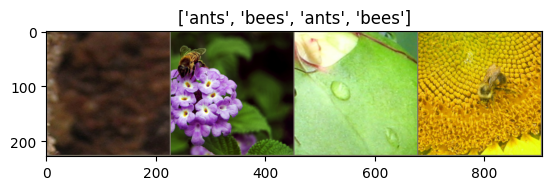

In [77]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

#Training the model

In [78]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

#Visualizing the model predictions

In [79]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

#Finetuning the convnet

In [81]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

#Train and evaluate

In [82]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.4935 Acc: 0.7500
val Loss: 0.1992 Acc: 0.8889

Epoch 1/24
----------
train Loss: 0.5260 Acc: 0.7705
val Loss: 0.2234 Acc: 0.9346

Epoch 2/24
----------
train Loss: 0.6112 Acc: 0.7664
val Loss: 0.2831 Acc: 0.8758

Epoch 3/24
----------
train Loss: 0.4028 Acc: 0.8156
val Loss: 0.2635 Acc: 0.9020

Epoch 4/24
----------
train Loss: 0.4919 Acc: 0.7869
val Loss: 0.3150 Acc: 0.8954

Epoch 5/24
----------
train Loss: 0.4857 Acc: 0.8361
val Loss: 0.4210 Acc: 0.8235

Epoch 6/24
----------
train Loss: 0.3254 Acc: 0.8607
val Loss: 0.5251 Acc: 0.8431

Epoch 7/24
----------
train Loss: 0.3167 Acc: 0.8648
val Loss: 0.3585 Acc: 0.8954

Epoch 8/24
----------
train Loss: 0.2389 Acc: 0.9057
val Loss: 0.3177 Acc: 0.9150

Epoch 9/24
----------
train Loss: 0.2858 Acc: 0.8893
val Loss: 0.3075 Acc: 0.9085

Epoch 10/24
----------
train Loss: 0.2782 Acc: 0.8975
val Loss: 0.3087 Acc: 0.9216

Epoch 11/24
----------
train Loss: 0.2722 Acc: 0.8852
val Loss: 0.2980 Acc: 0.9281

Ep

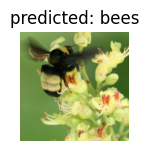

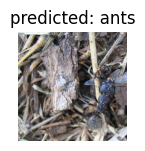

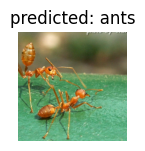

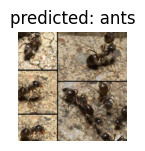

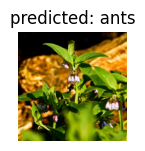

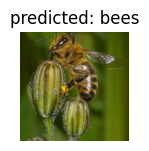

In [83]:
visualize_model(model_ft)

#ConvNet as fixed feature extractor

In [84]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

#Train and Evaluate

In [85]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6738 Acc: 0.6270
val Loss: 0.1946 Acc: 0.9542

Epoch 1/24
----------
train Loss: 0.6053 Acc: 0.7418
val Loss: 0.4579 Acc: 0.8039

Epoch 2/24
----------
train Loss: 0.7076 Acc: 0.7623
val Loss: 0.1548 Acc: 0.9542

Epoch 3/24
----------
train Loss: 0.5098 Acc: 0.8156
val Loss: 0.2042 Acc: 0.9346

Epoch 4/24
----------
train Loss: 0.4715 Acc: 0.8197
val Loss: 0.1582 Acc: 0.9542

Epoch 5/24
----------
train Loss: 0.4952 Acc: 0.7992
val Loss: 0.2273 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.5535 Acc: 0.7787
val Loss: 0.2457 Acc: 0.9150

Epoch 7/24
----------
train Loss: 0.3787 Acc: 0.8115
val Loss: 0.1730 Acc: 0.9608

Epoch 8/24
----------
train Loss: 0.4363 Acc: 0.8033
val Loss: 0.1876 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.2560 Acc: 0.8852
val Loss: 0.1956 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.3782 Acc: 0.8607
val Loss: 0.2034 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.3251 Acc: 0.8361
val Loss: 0.1829 Acc: 0.9477

Ep

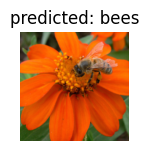

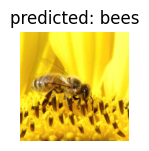

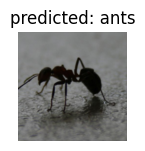

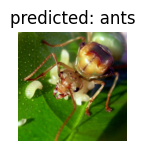

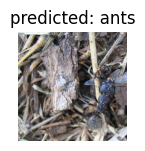

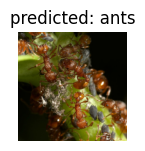

In [86]:
visualize_model(model_conv)

plt.ioff()
plt.show()

#Q12.Summarize your findings and write your references.

I got to know many things about the four models we used and get to apply the theoritical concepts that I learned in class like data analysis and get to know various predefined functions that we used for data analysis like imputation and feature elimination using REFCV function.
I took help from my peers, Sanket Potdar(20d070078) and Ronil Mandavia(20d180020) and all other references I wrote at that place only where I used that reference.